In [6]:
#Standard libraries for data analysis:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#sklearn modules for Model Evaluation & Improvement:
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
#Standard libraries for data visualization:
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sns.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve
import plotly.express as px
#Miscellaneous Utilitiy Libraries:
    
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 7000)
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
import warnings
warnings.filterwarnings('ignore')

## 1. Import and understand the data.

In [7]:
# 1.A reading the CSV file into pandas dataframe
signal = pd.read_csv('signal-data.csv')
signal.head()

,Time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.73,1411.13,1.36,100.00,97.61,0.12,1.50,0.02,-0.00,0.95,202.44,0.00,7.96,414.87,10.04,0.97,192.40,12.52,1.40,-5419.00,2916.50,-4043.75,751.00,0.90,1.77,3.05,64.23,2.02,0.16,3.52,83.40,9.51,50.62,64.26,49.38,66.31,86.96,117.51,61.29,4.51,70.00,352.72,10.18,130.37,723.31,1.31,141.23,1.00,624.31,218.32,0.00,4.59,4.84,2834.00,0.93,0.95,4.71,-1.73,350.93,10.62,108.64,16.14,21.73,29.54,693.77,0.92,148.60,1.00,608.17,84.08,NaN,NaN,0.00,0.01,-0.02,0.01,-0.03,-0.01,-0.00,-0.06,-0.00,7.22,0.13,NaN,2.39,0.97,1747.60,0.18,8671.93,-0.33,-0.01,-0.00,0.00,0.00,-0.28,0.00,0.40,-0.03,0.00,0.00,0.14,-0.00,0.00,0.01,0.00,-0.25,0.32,NaN,NaN,NaN,NaN,0.95,0.00,748.61,0.99,58.43,0.60,0.98,6.38,15.88,2.64,15.94,15.93,0.87,3.35,0.41,3.19,-0.05,0.72,1.00,2.30,1000.73,39.24,123.00,111.30,75.20,46.20,350.67,0.39,0.00,6.78,0.00,0.09,0.09,0.04,0.03,12.26,0.00,4.27,10.28,0.47,0.02,11.89,0.41,0.05,NaN,NaN,1017.00,967.00,1066.00,368.00,0.09,0.05,0.10,2.00,0.90,0.07,0.05,0.72,0.11,0.32,0.59,0.32,0.95,0.40,0.16,0.00,0.00,20.95,0.33,12.49,16.71,0.08,5.72,0.00,11.19,65.36,0.00,0.00,0.00,0.00,0.00,0.00,0.29,5.38,20.10,0.30,10.62,10.30,5.38,4.04,16.23,0.30,8.64,0.00,10.30,97.31,0.00,0.08,0.06,0.07,0.05,0.07,0.05,0.03,0.11,3.48,0.00,NaN,0.07,0.02,175.22,0.03,1940.40,0.00,0.07,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,0.02,0.00,219.95,0.00,2.84,0.02,0.01,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,40.85,4.52,30.98,33.96,22.91,15.95,110.21,0.13,0.00,2.59,0.00,0.03,0.02,0.01,0.01,3.93,0.00,1.51,3.58,0.13,0.01,3.84,0.11,0.02,NaN,NaN,418.14,398.32,496.16,158.33,0.04,0.02,0.05,0.61,0.30,0.02,0.02,0.28,0.04,0.13,0.24,0.13,0.37,0.14,0.06

In [8]:
df=signal.iloc[0:1547,:]
row,column=df.shape
print('The training dataset contains', row, 'rows and', column, 'columns')

The training dataset contains 1547 rows and 592 columns


In [9]:
val=signal.iloc[1547:1567,:]
row,column=val.shape
print('The validation dataset contains', row, 'rows and', column, 'columns')

The validation dataset contains 20 rows and 592 columns


In [10]:
df.shape

(1547, 592)

In [11]:
#1.B
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.0+ MB


In [12]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1541.00,1540.00,1533.00,1533.00,1533.00,1533.00,1533.00,1538.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1537.00,1547.00,1545.00,1545.00,1545.00,1545.00,1545.00,1545.00,1545.00,1545.00,1545.00,1545.00,1545.00,1546.00,1546.00,1546.00,1546.00,1546.00,1546.00,1546.00,1546.00,1523.00,1523.00,1546.00,1546.00,1546.00,1546.00,1546.00,1546.00,1546.00,1546.00,1546.00,1546.00,1546.00,1543.00,1543.00,1543.00,1543.00,1543.00,1543.00,1540.00,1541.00,1541.00,1541.00,1540.00,1540.00,1540.00,1541.00,1541.00,1541.00,1541.00,1541.00,1541.00,771.00,771.00,1541.00,1542.00,1542.00,1542.00,1542.00,1542.00,1542.00,1542.00,1542.00,1547.00,1535.00,222.00,1547.00,1547.00,1547.00,1504.00,1504.00,1541.00,1545.00,1545.00,1541.00,1541.00,1541.00,1541.00,1541.00,1541.00,1541.00,1541.00,1541.00,1545.00,1545.00,1541.00,1541.00,1541.00,1541.00,529.00,529.00,529.00,852.00,1547.00,1547.00,1547.00,1547.00,1547.00,1542.00,1547.00,1547.00,1541.00,1541.00,1541.00,1541.00,1541.00,1541.00,1541.00,1541.00,1541.00,1541.00,1541.00,1542.00,1542.00,1542.00,1542.00,1541.00,1540.00,1533.00,1533.00,1533.00,1533.00,1533.00,1538.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1537.00,1547.00,138.00,138.00,1545.00,1545.00,1545.00,1545.00,1545.00,1545.00,1545.00,1545.00,1545.00,1545.00,1545.00,1546.00,1546.00,1546.00,1546.00,1546.00,1546.00,1546.00,1546.00,1523.00,1546.00,1546.00,1546.00,1546.00,1546.00,1546.00,1546.00,1546.00,1546.00,1546.00,1546.00,1543.00,1543.00,1543.00,1543.00,1543.00,1543.00,1540.00,1541.00,1541.00,1541.00,1540.00,1540.00,1540.00,1541.00,1541.00,1541.00,1541.00,1541.00,1541.00,1541.00,1542.00,1542.00,1542.00,1542.00,1542.00,1542.00,1542.00,1542.0

#### Insights
1. Few columns have missing values as it shows count <1547.Few variable examples: 2,3,100,102 etc,.
2. Few columns have 0 variance which should be dropped as they won't contribute anything to the model. Example: 5, 13 etc,.
3. Few variables are positive and negative skewed

## 2 Data cleaning

In [13]:
#To check null values
df.isna().sum()

Time         0   
0            6   
1            7   
2            14  
3            14  
4            14  
5            14  
6            14  
7            9   
8            0   
9            0   
10           0   
11           0   
12           0   
13           0   
14           0   
15           0   
16           0   
17           0   
18           0   
19           10  
20           0   
21           2   
22           2   
23           2   
24           2   
25           2   
26           2   
27           2   
28           2   
29           2   
30           2   
31           2   
32           1   
33           1   
34           1   
35           1   
36           1   
37           1   
38           1   
39           1   
40           24  
41           24  
42           1   
43           1   
44           1   
45           1   
46           1   
47           1   
48           1   
49           1   
50           1   
51           1   
52           1   
53           4   
54        

In [14]:
#2.A
row_count = df.shape[0]
columns_to_drop = []

for column in df:
    count = df[column].isna().sum()
    
    if count / row_count >= 0.8:
        columns_to_drop.append(column)

df1 = df.drop(columns_to_drop, axis=1)
df1 = df1.fillna(df1.mean())
print(df1.isna().sum())

Time         0
0            0
1            0
2            0
3            0
4            0
5            0
6            0
7            0
8            0
9            0
10           0
11           0
12           0
13           0
14           0
15           0
16           0
17           0
18           0
19           0
20           0
21           0
22           0
23           0
24           0
25           0
26           0
27           0
28           0
29           0
30           0
31           0
32           0
33           0
34           0
35           0
36           0
37           0
38           0
39           0
40           0
41           0
42           0
43           0
44           0
45           0
46           0
47           0
48           0
49           0
50           0
51           0
52           0
53           0
54           0
55           0
56           0
57           0
58           0
59           0
60           0
61           0
62           0
63           0
64           0
65        

In [15]:
columns_to_drop

['85', '157', '158', '220', '292', '293', '358', '492']

In [16]:
df1.shape

(1547, 584)

In [17]:
#2.B
columns_to_drop = []

for column in df1:
    count = df1[column].nunique()
    
    if count == 1:
        columns_to_drop.append(column)

df2 = df1.drop(columns_to_drop, axis=1)

In [18]:
df2.shape

(1547, 468)

In [19]:
#2.C

# check variables with less variance
##let's remove time because it's not required for modelling
df_new = df2.drop('Time', axis =1)

#removing variables with less than 5% variance because with less variance they won't be able to contribute to the model
from sklearn.feature_selection import VarianceThreshold
threshold_n=0.95
sel = VarianceThreshold(threshold=(threshold_n* (1 - threshold_n) ))
sel_var=sel.fit_transform(df_new)
df3 = df_new[df_new.columns[sel.get_support(indices=True)]] 

In [20]:
df3.shape

(1547, 286)

In [21]:
df3.columns

Index(['0', '1', '2', '3', '4', '6', '12', '14', '15', '16',
       ...
       '571', '572', '573', '574', '576', '577', '581', '585', '589',
       'Pass/Fail'],
      dtype='object', length=286)

#### Feature Selection

In [22]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [23]:
x = df3.drop('Pass/Fail', axis = 1)
y = df3['Pass/Fail']

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [25]:
print('Training dataset shape:', x_train.shape, y_train.shape)
print('Testing dataset shape:', x_test.shape, y_test.shape)

Training dataset shape: (1082, 285) (1082,)
Testing dataset shape: (465, 285) (465,)


In [26]:
# Build Lin Reg  to use in feature selection
import numpy as np
import pandas as pd  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline 
linR = LinearRegression()

In [27]:
# Build step forward feature selection
sfs1 = sfs(linR, k_features=100, forward=True, scoring='r2', cv=5)

In [28]:
# Perform SFFS
sfs1 = sfs1.fit(x_train.values, y_train.values)

In [29]:
sfs1.get_metric_dict()

{1: {'feature_idx': (37,),
  'cv_scores': array([-0.04160854,  0.04464049,  0.02630004,  0.00345407,  0.01708174]),
  'avg_score': 0.009973558953797168,
  'feature_names': ('37',),
  'ci_bound': 0.037349117215258444,
  'std_dev': 0.029058882065738388,
  'std_err': 0.01452944103286919},
 2: {'feature_idx': (37, 45),
  'cv_scores': array([ 0.03617218,  0.06614132,  0.03457481, -0.01455237,  0.01366137]),
  'avg_score': 0.027199459881622468,
  'feature_names': ('37', '45'),
  'ci_bound': 0.034381800802765976,
  'std_dev': 0.026750209087328017,
  'std_err': 0.013375104543664008},
 3: {'feature_idx': (12, 37, 45),
  'cv_scores': array([ 0.03572233,  0.07585633,  0.05359065, -0.00858277,  0.02538255]),
  'avg_score': 0.03639381817417771,
  'feature_names': ('12', '37', '45'),
  'ci_bound': 0.03634266825413309,
  'std_dev': 0.028275830581603753,
  'std_err': 0.014137915290801875},
 4: {'feature_idx': (12, 37, 45, 92),
  'cv_scores': array([0.034783  , 0.08698483, 0.04929543, 0.01286851, 0.033

In [30]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

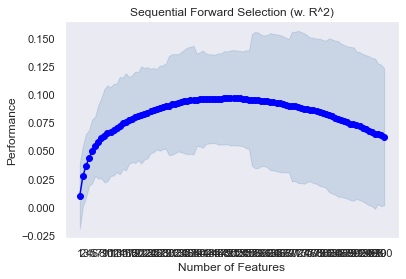

In [31]:
fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [32]:
# Which features?
columnList = list(x_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[2, 6, 7, 11, 12, 14, 16, 17, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 37, 38, 39, 45, 49, 50, 53, 55, 56, 59, 60, 61, 64, 65, 66, 67, 79, 82, 86, 88, 90, 92, 102, 103, 112, 115, 118, 122, 131, 134, 139, 141, 142, 156, 163, 164, 167, 172, 174, 177, 180, 181, 185, 189, 190, 194, 196, 197, 198, 199, 201, 202, 203, 204, 207, 208, 217, 221, 223, 225, 226, 229, 230, 247, 248, 249, 252, 255, 256, 259, 264, 266, 270, 272, 274, 275, 279, 281, 282]


In [33]:
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

['2', '12', '14', '19', '21', '23', '27', '28', '32', '33', '34', '35', '37', '38', '39', '40', '41', '43', '45', '46', '48', '59', '60', '61', '67', '72', '73', '90', '98', '110', '117', '122', '125', '129', '133', '134', '135', '155', '161', '166', '177', '181', '183', '201', '202', '225', '250', '269', '273', '290', '296', '318', '321', '323', '346', '388', '390', '408', '413', '416', '419', '423', '424', '428', '432', '433', '437', '439', '440', '442', '448', '453', '454', '455', '456', '460', '467', '476', '480', '483', '485', '486', '489', '490', '522', '523', '524', '527', '541', '545', '548', '553', '555', '562', '566', '569', '570', '574', '577', '581']


In [34]:
sfs1.k_score_

0.06221854074892084

##### Since the feature selection is not giving good R2 we will not apply this and proceed with the df3 dataframe.

In [35]:
#2.d

df4=df3.copy() # to create copy so as to delete pass/ fail column as we don't want to check the multicollinearity with that as of now
df4.drop(['Pass/Fail'],axis=1,inplace=True)

# Create correlation matrix
corr_matrix = df4.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.70
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]

# Drop features 
df4.drop(to_drop, axis=1, inplace=True)

In [36]:
row,column=df4.shape
print('After dropping the correlated variables the dataset contains', row, 'rows and', column, 'columns')

After dropping the correlated variables the dataset contains 1547 rows and 151 columns


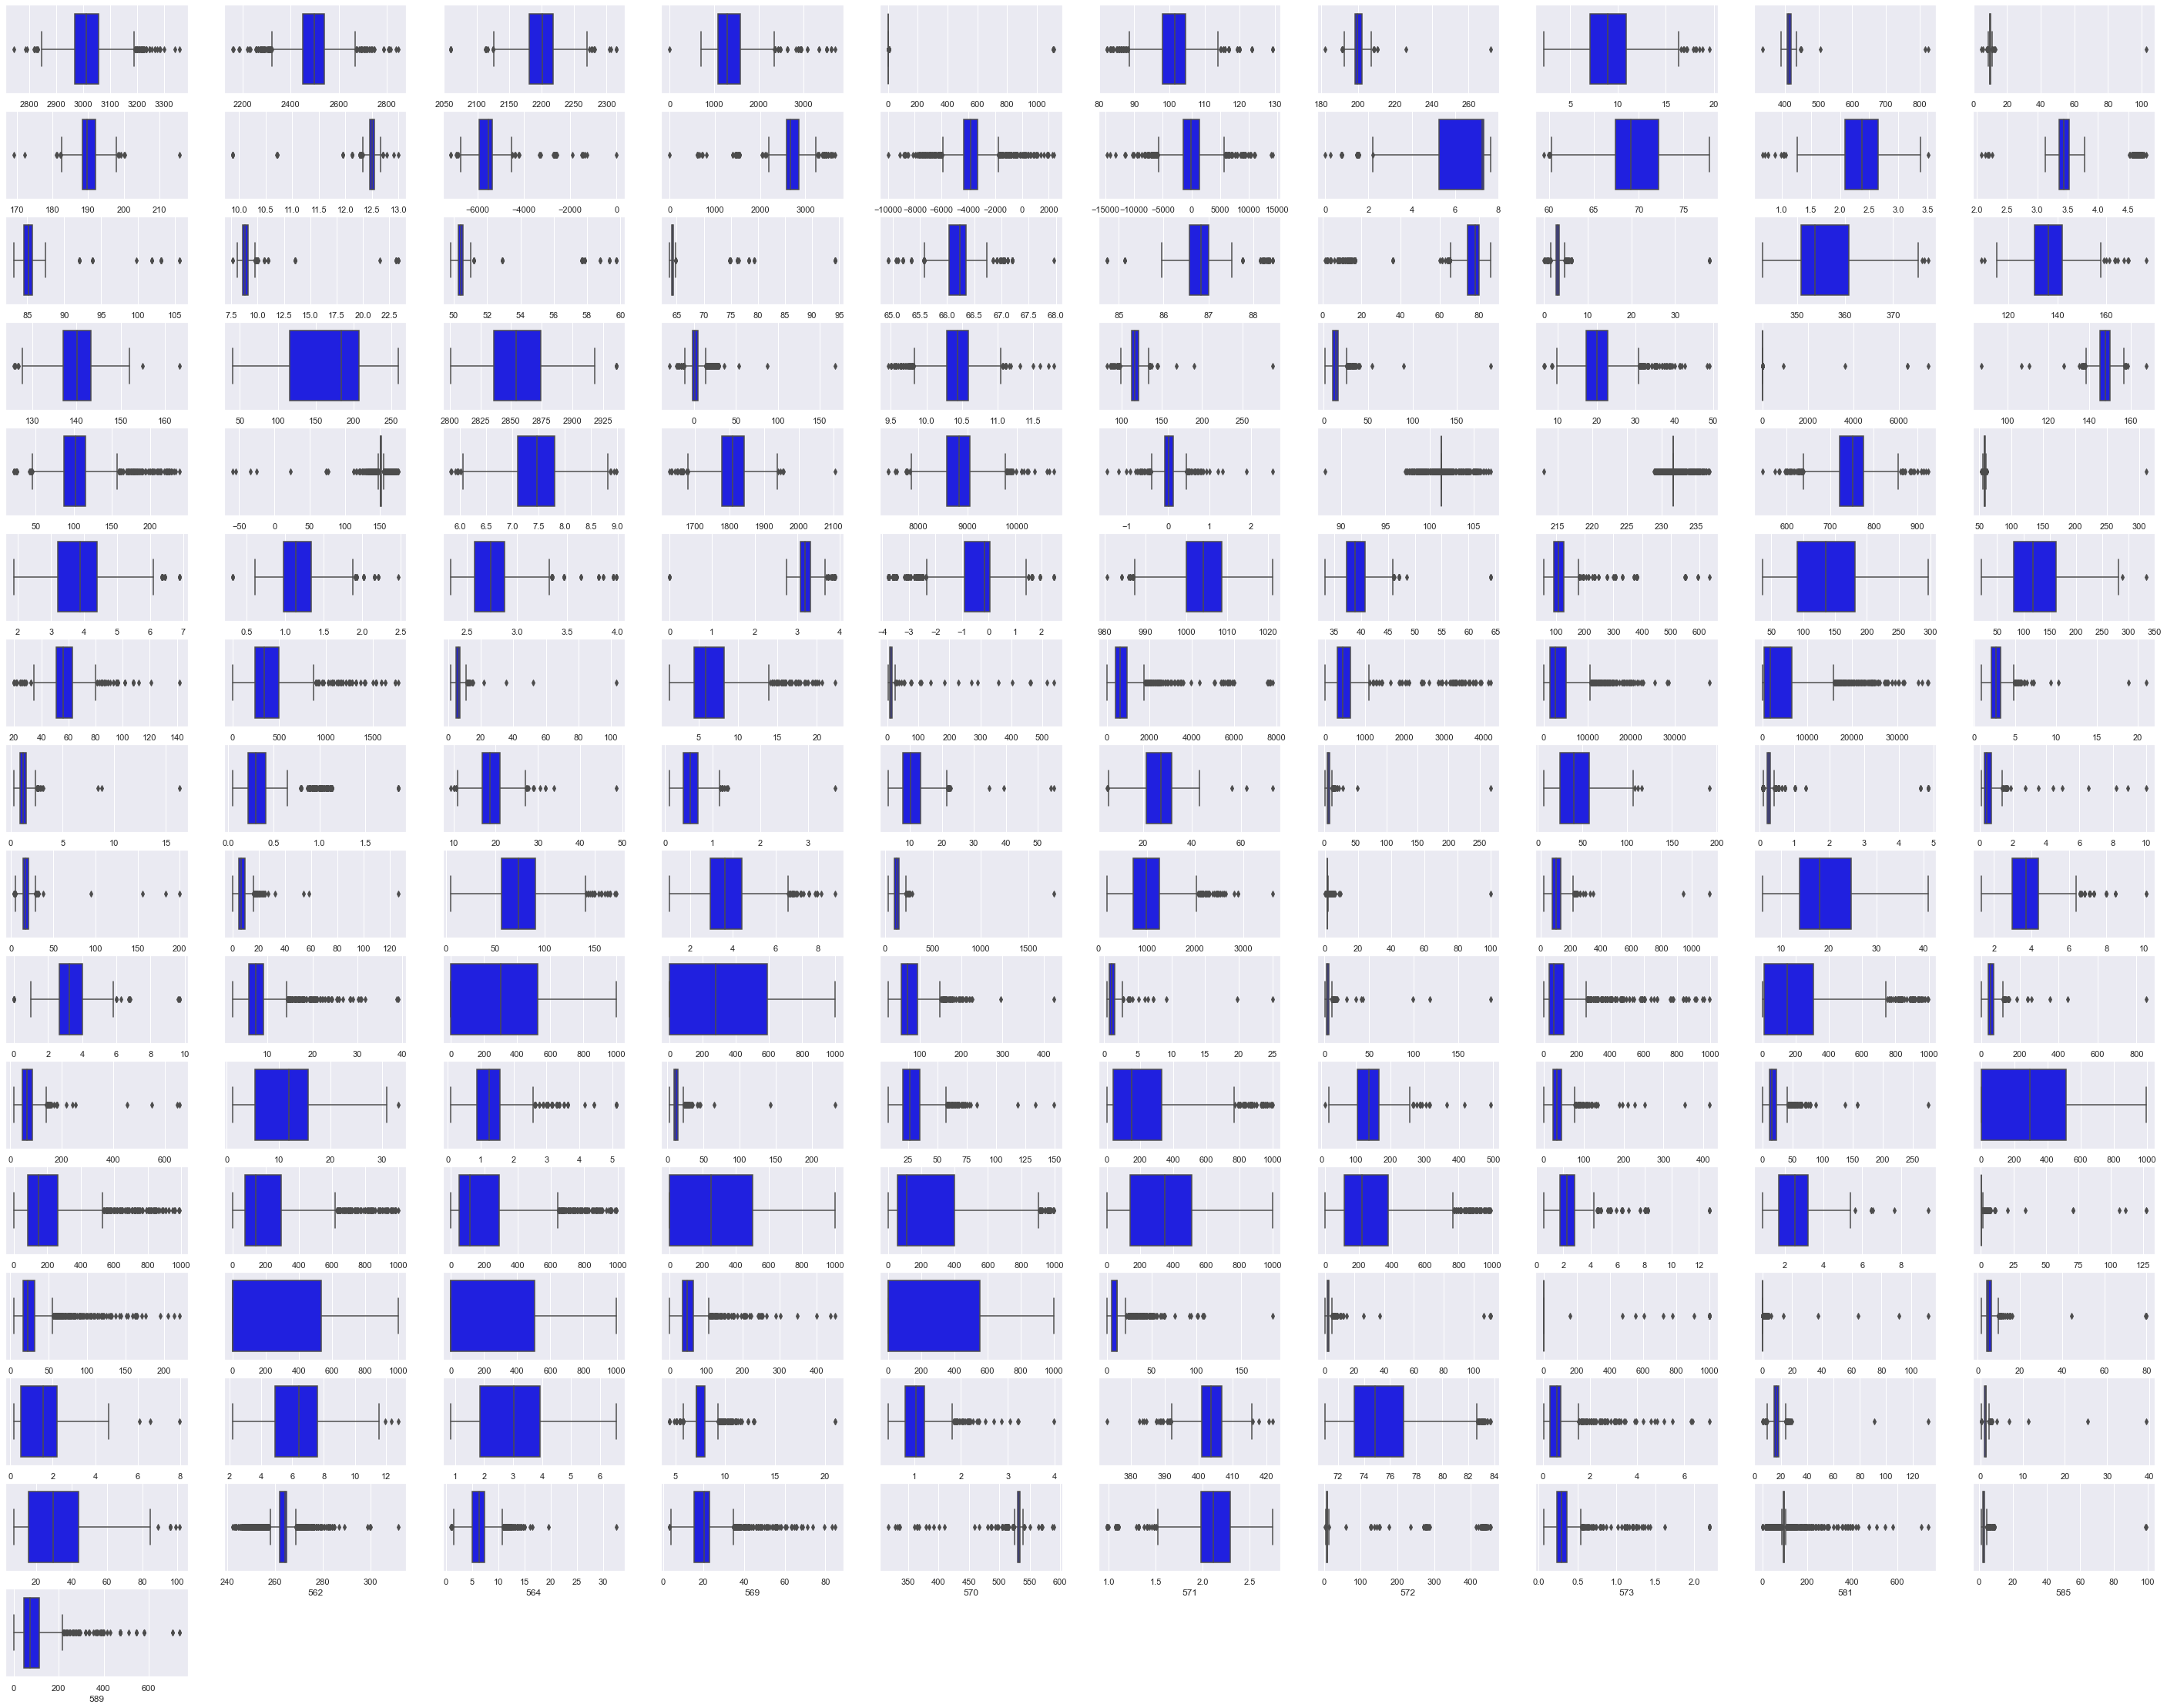

In [37]:
#2.E 
#Boxplot to check for outliers
plt.figure(figsize=(50, 50))
col = 1
for i in df4.columns:
    plt.subplot(20,10, col)
    sns.boxplot(df4[i],color='blue')
    col += 1

In [38]:
#find the outliers and replace them by median so that they don't bias the model
for i in df4.columns:
    q1 = df4[i].quantile(0.25)
    q3 = df4[i].quantile(0.75)
    iqr = q3 - q1
    
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    
    df4.loc[(df4[i] < low) | (df4[i] > high), i] = df4[i].median()

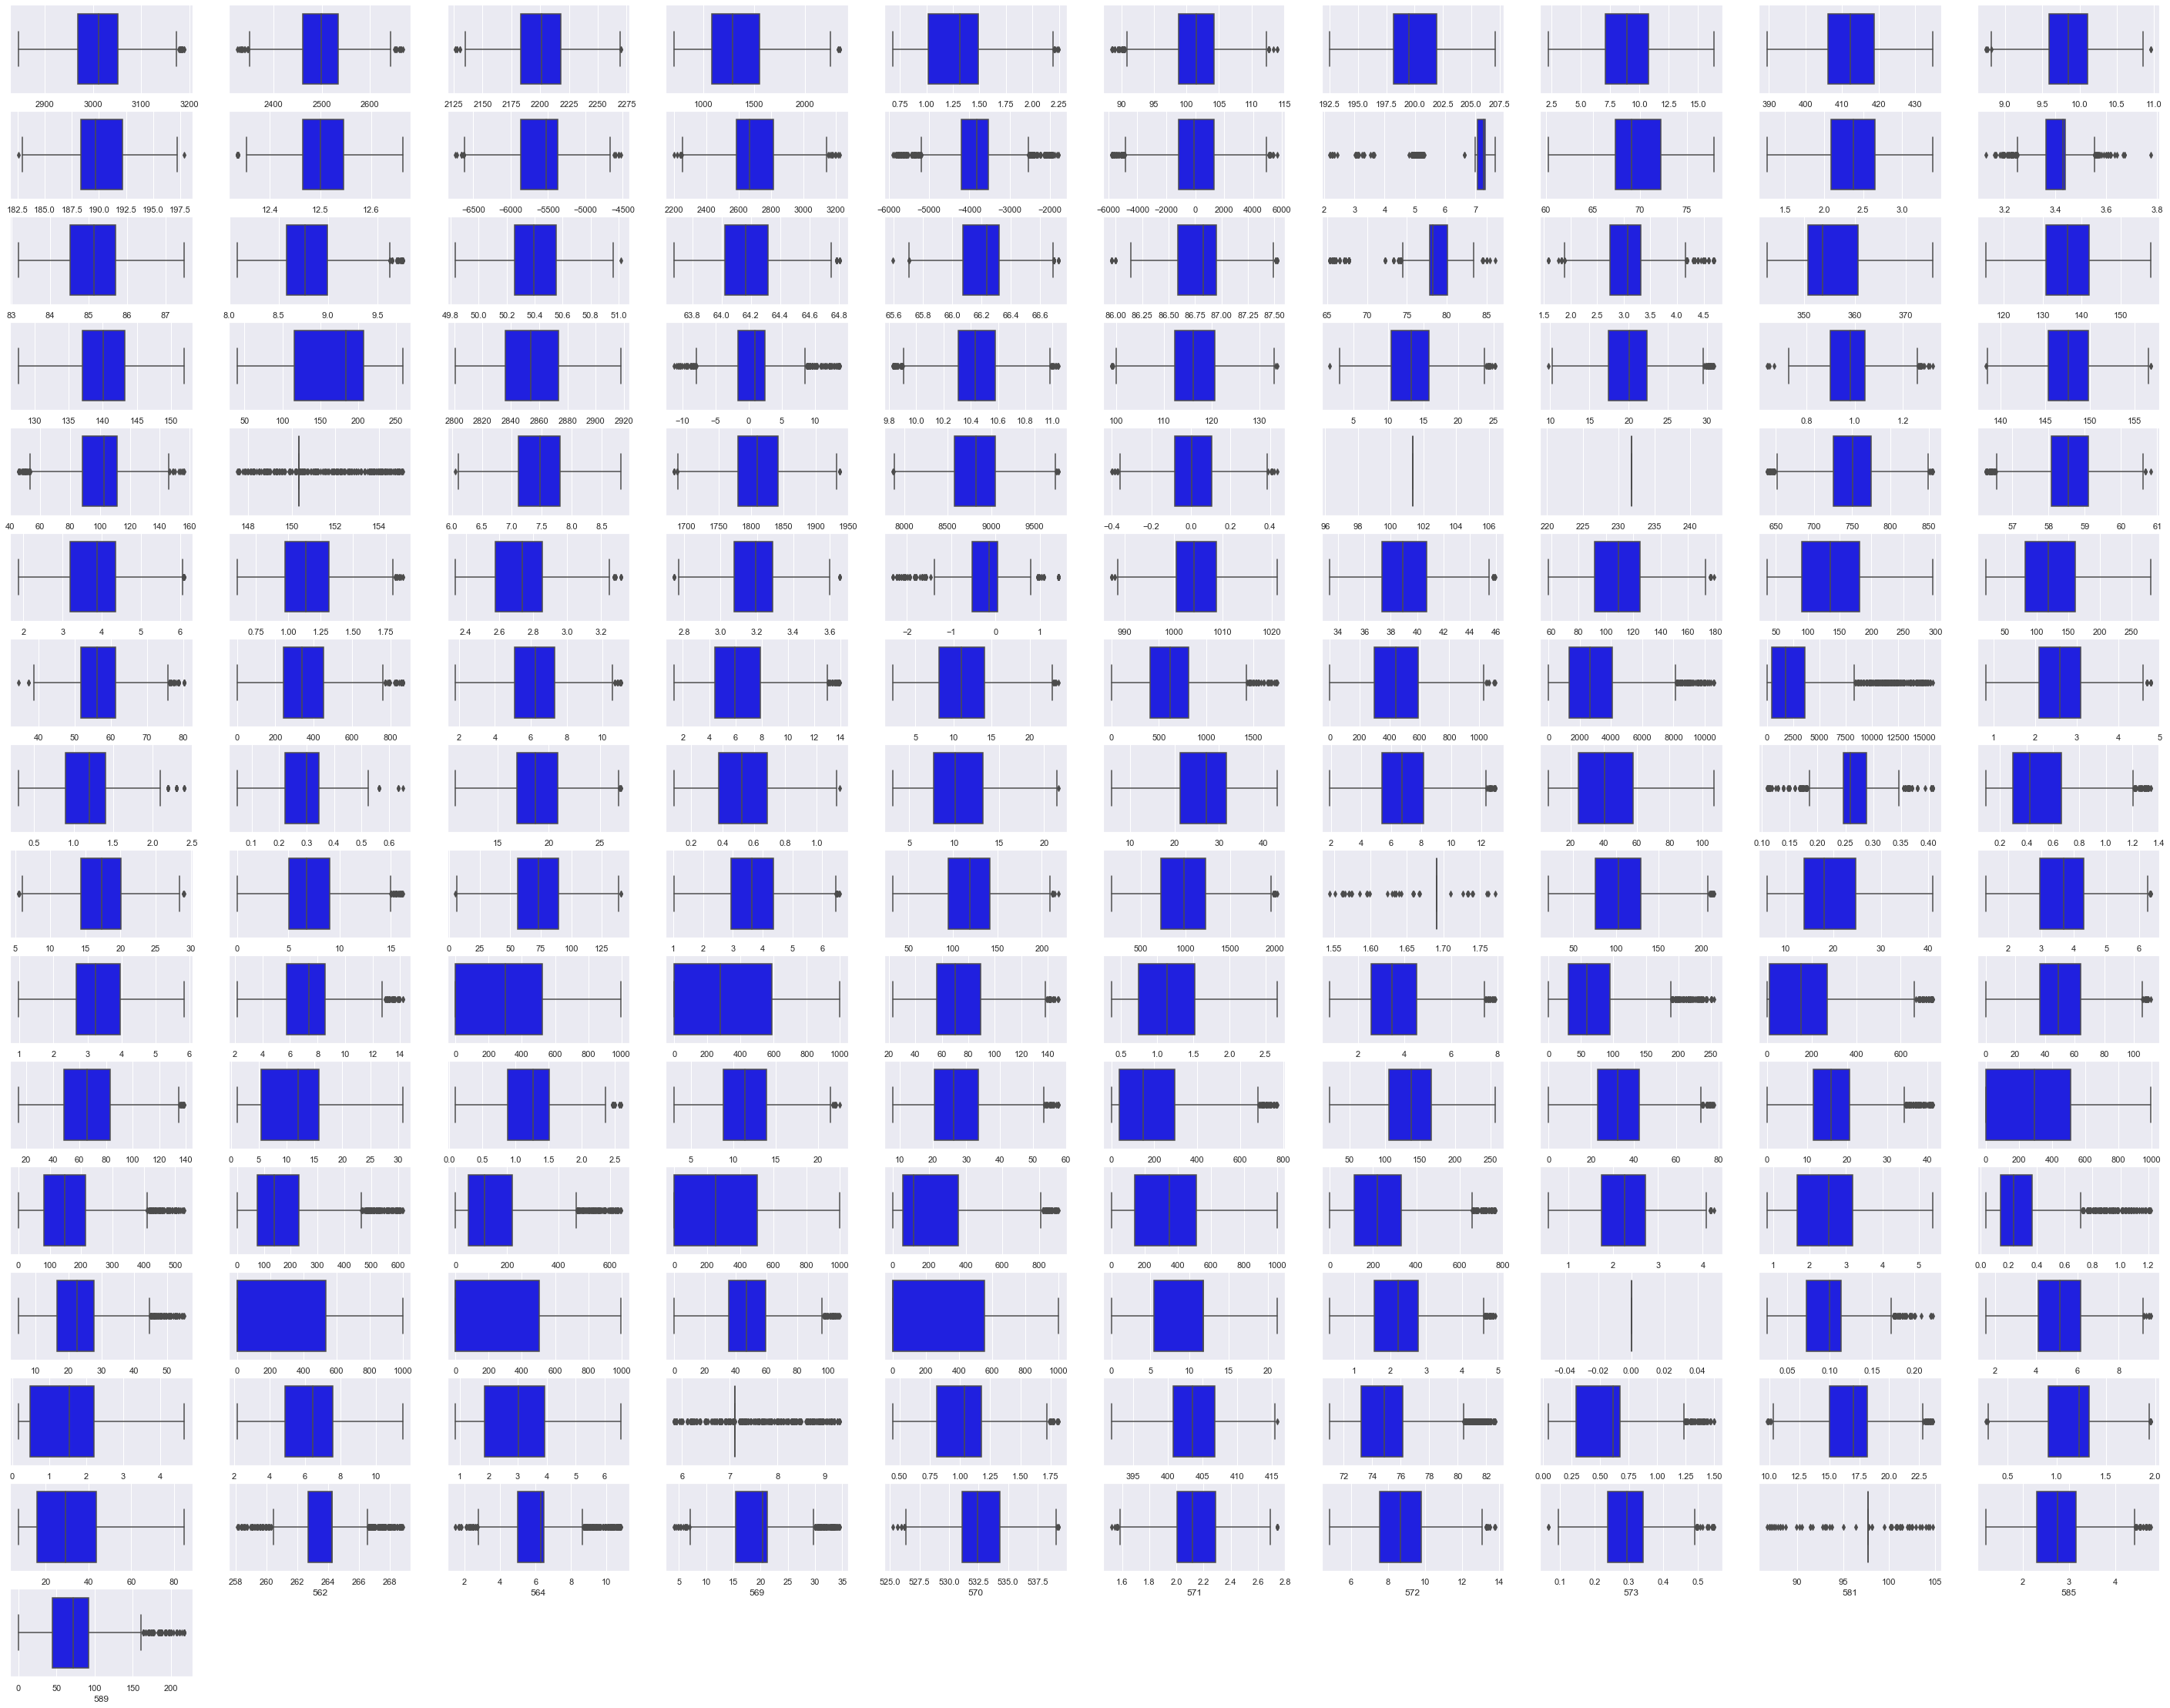

In [39]:
#After treating the outlier values let's plot the boxplot again
plt.figure(figsize=(50, 50))
col = 1
for i in df4.columns:
    plt.subplot(20,10, col)
    sns.boxplot(df4[i],color='blue')
    col += 1

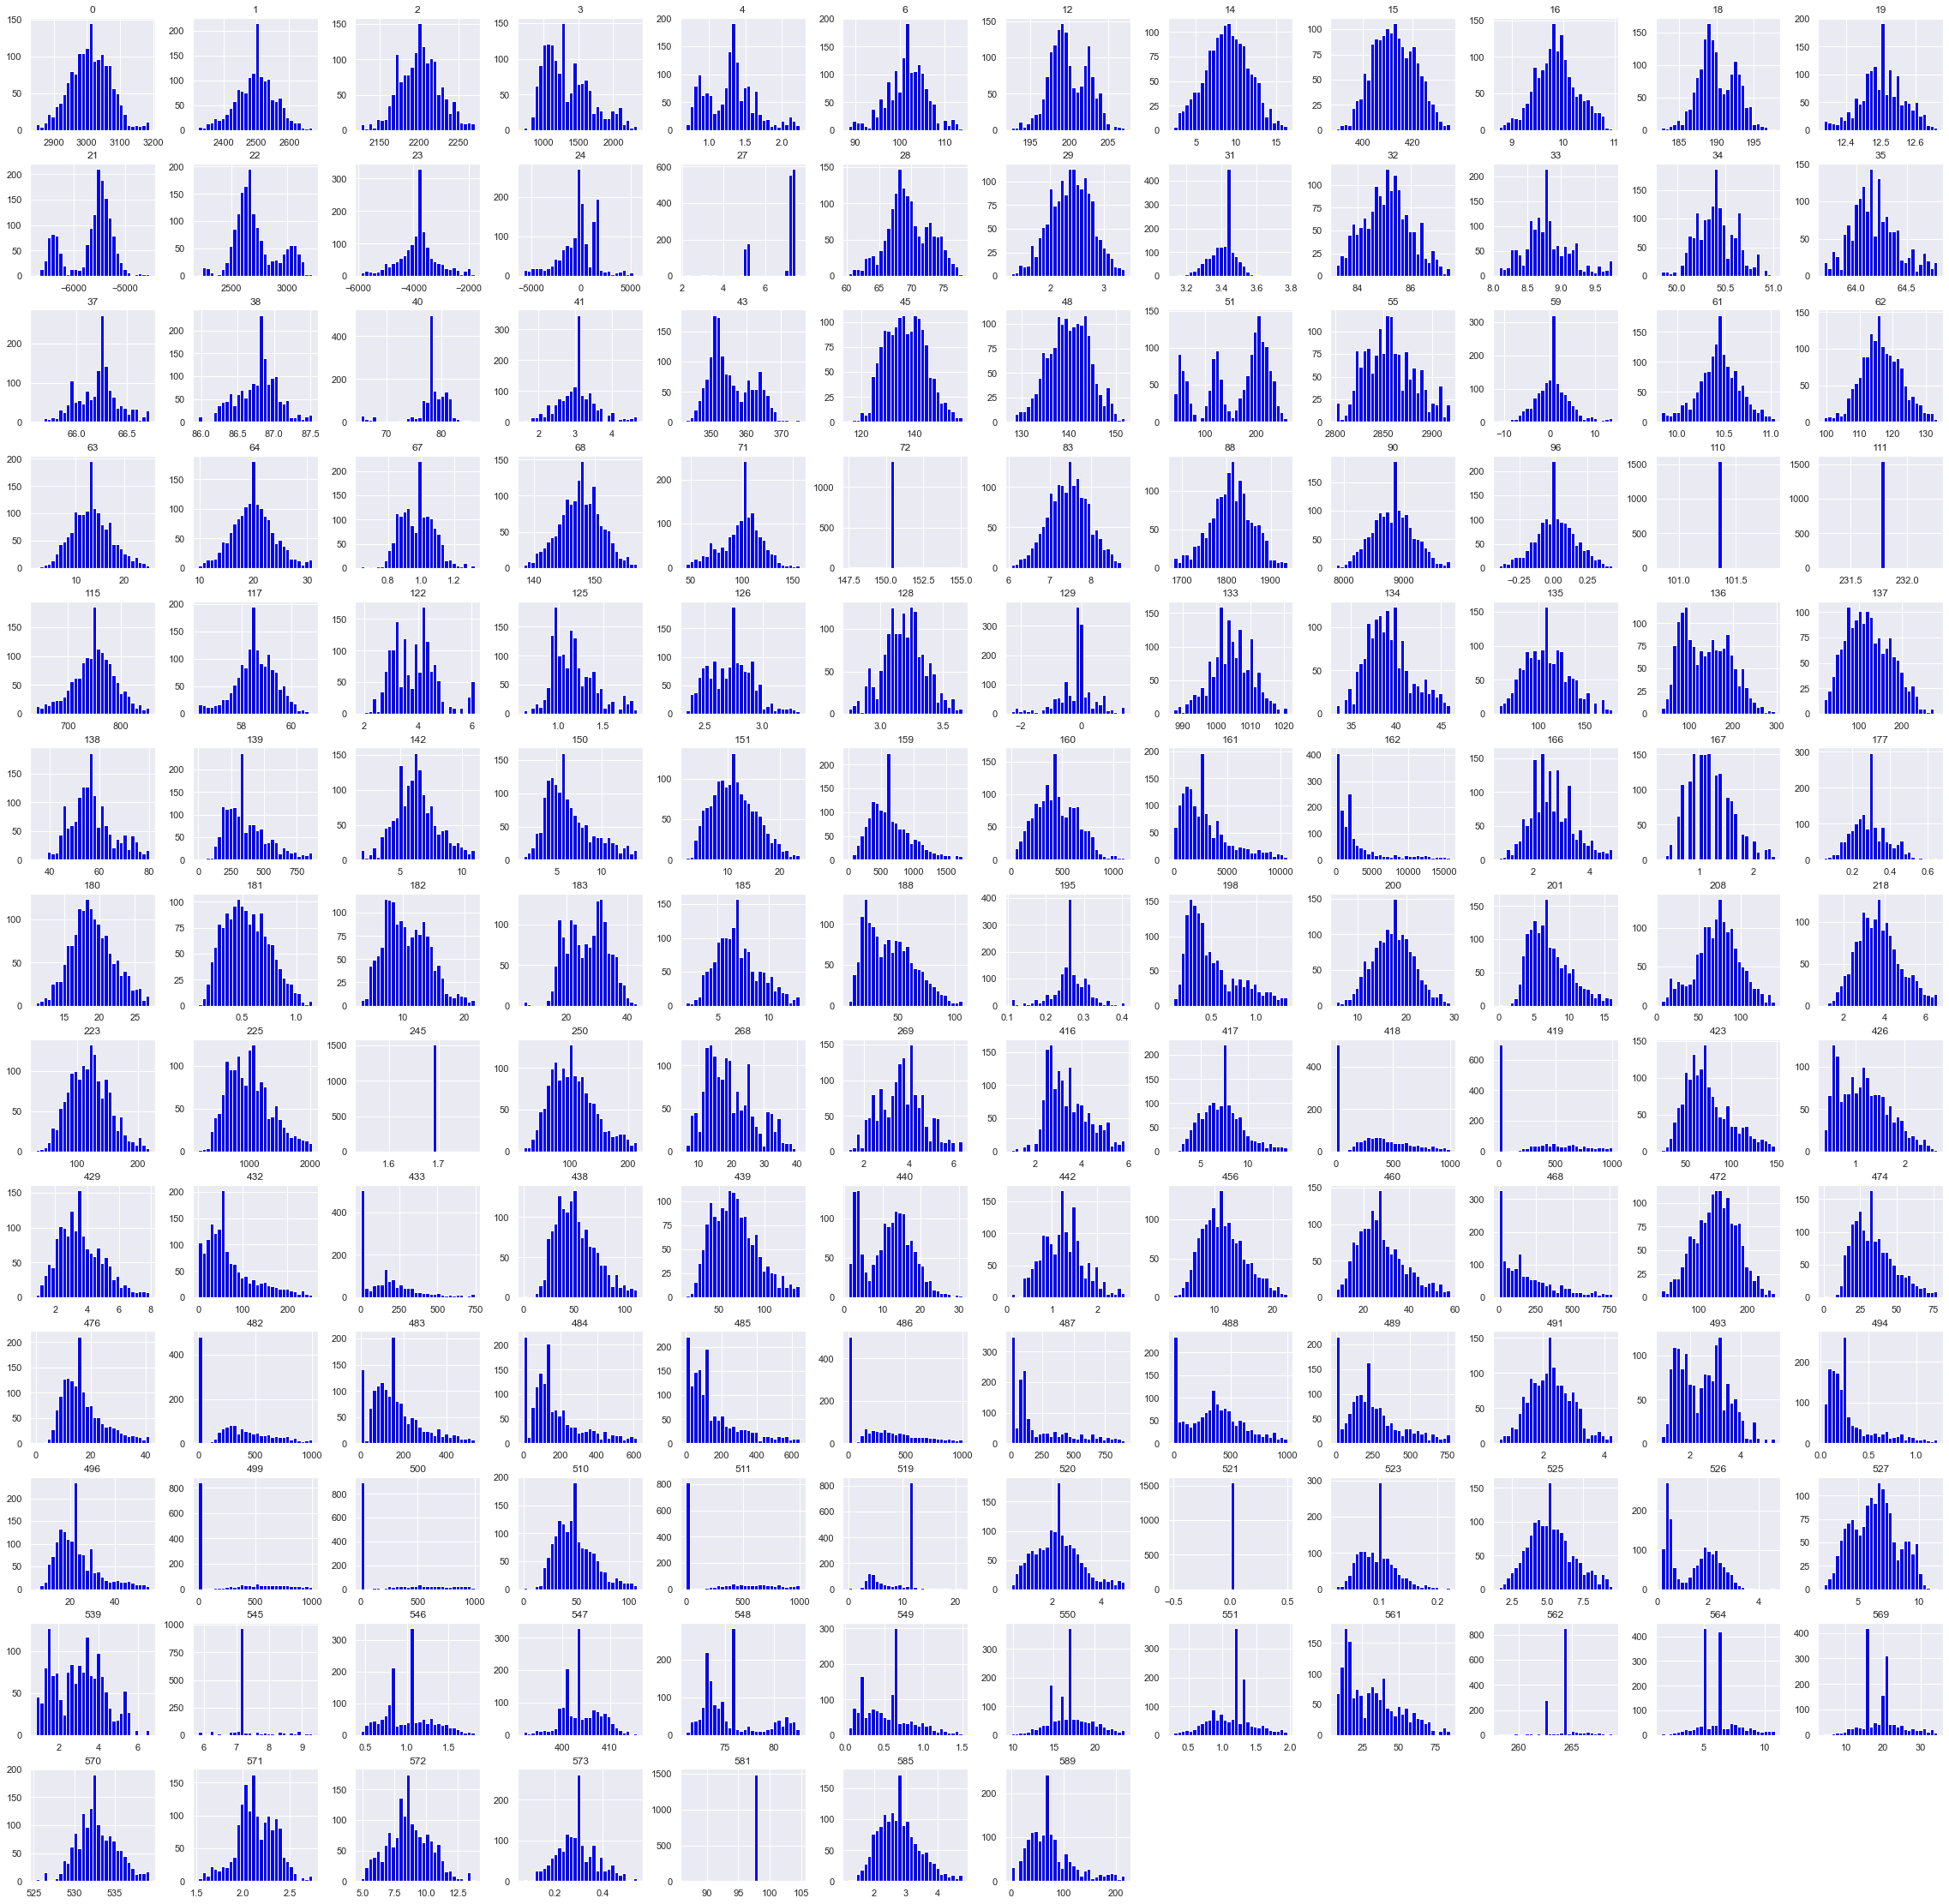

In [40]:
#plot histogram to check for the frequency of values within a feature variable
df4.hist(bins = 30, figsize = (40, 40), color = 'blue')
plt.show()

In [41]:
df4.shape

(1547, 151)

##### In this I did the outlier treatment

## 3. Data analysis & visualisation

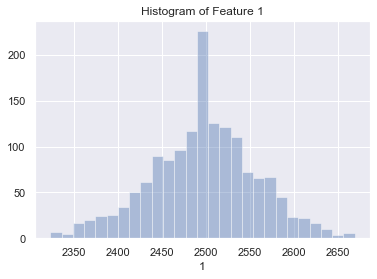

In [42]:
#3.A
sns.distplot(df4['1'], kde=False)
plt.title('Histogram of Feature 1')
plt.show();

##### It has close to normal distribution

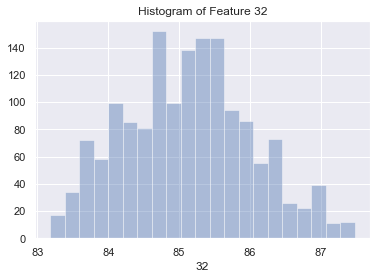

In [43]:
sns.distplot(df4['32'], kde=False)
plt.title('Histogram of Feature 32')
plt.show();

##### The data points are equally distributed between 83 -87. Few peaks are seen in between.

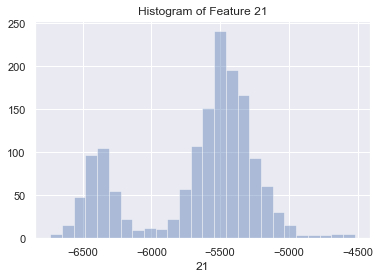

In [44]:
sns.distplot(df4['21'], kde=False)
plt.title('Histogram of Feature 21')
plt.show();

##### Bi modal distribution for feature 21 which can be interpreted as that they might have two clusters or two types of customers

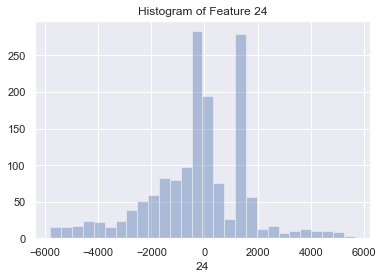

In [45]:
sns.distplot(df4['24'], kde=False)
plt.title('Histogram of Feature 24')
plt.show();

##### This might need some transformation/ scaling to follow proper normal distribution

In [46]:
df4.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,1547.00,3009.86,60.92,2846.07,2968.90,3011.84,3051.38,3188.90
1,1547.00,2497.17,59.92,2323.34,2459.74,2498.91,2534.67,2669.09
2,1547.00,2201.08,25.78,2126.66,2183.10,2200.99,2217.81,2270.26
3,1547.00,1346.95,334.56,711.03,1084.38,1287.35,1553.32,2341.78
4,1547.00,1.30,0.33,0.68,1.02,1.32,1.49,2.24
6,1547.00,101.44,4.42,88.47,98.81,101.51,104.22,113.88
12,1547.00,199.89,2.47,192.52,198.16,199.54,201.96,207.15
14,1547.00,8.93,2.71,2.25,7.07,8.94,10.80,16.36
15,1547.00,412.48,8.48,389.47,406.13,412.21,418.89,434.79
16,1547.00,9.86,0.41,8.74,9.59,9.85,10.11,10.96


##### Now, the nulls are not there in any columns. But I still see the distribution is skewed for few features which indicates that we need scaling. Also, outliers are checked in above question where there were few variables with outliers and that were removed by the median.

In [47]:
# to check how is different variable mean and sd change basis target variable
def printMeanAndSdByGroup(variables, groupvariable):
    data_groupby = variables.groupby(groupvariable)
    print("## Means:")
    display(data_groupby.apply(np.mean))
    print("\n## Standard deviations:")
    display(data_groupby.apply(np.std))
    print("\n## Sample sizes:")
    display(pd.DataFrame(data_groupby.apply(len)))

In [48]:
X = df4
y = df3['Pass/Fail']
printMeanAndSdByGroup(X, y)

## Means:


,0,1,2,3,4,6,12,14,15,16,18,19,21,22,23,24,27,28,29,31,32,33,34,35,37,38,40,41,43,45,48,51,55,59,61,62,63,64,67,68,71,72,83,88,90,96,110,111,115,117,122,125,126,128,129,133,134,135,136,137,138,139,142,150,151,159,160,161,162,166,167,177,180,181,182,183,185,188,195,198,200,201,208,218,223,225,245,250,268,269,416,417,418,419,423,426,429,432,433,438,439,440,442,456,460,468,472,474,476,482,483,484,485,486,487,488,489,491,493,494,496,499,500,510,511,519,520,521,523,525,526,527,539,545,546,547,548,549,550,551,561,562,564,569,570,571,572,573,581,585,589
Pass/Fail,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-1,3010.91,2497.30,2201.39,1348.54,1.30,101.44,199.88,8.98,412.45,9.86,190.04,12.50,-5672.63,2714.69,-3845.43,-213.78,6.73,69.61,2.37,3.41,85.11,8.79,50.40,64.19,66.21,86.78,78.31,3.05,355.53,136.53,140.03,157.29,2856.11,0.46,10.44,116.51,13.27,19.98,0.98,147.60,99.41,150.51,7.46,1809.99,8820.62,0.01,101.34,231.76,749.63,58.57,3.88,1.17,2.72,3.19,-0.21,1004.22,39.20,109.46,138.14,122.28,57.11,366.41,6.29,6.45,11.26,644.62,443.78,3008.51,2976.92,2.66,1.20,0.29,18.99,0.54,10.60,26.57,6.95,42.86,0.26,0.51,17.15,7.22,72.29,3.71,119.85,1000.79,1.69,105.41,19.51,3.68,3.40,7.33,322.43,309.52,73.85,1.17,3.62,70.44,175.75,51.61,67.69,11.52,1.25,11.55,27.55,200.54,136.07,34.02,17.10,318.93,161.48,173.26,156.64,300.11,223.18,355.67,241.85,2.24,2.51,0.31,23.34,265.25,240.48,48.30,270.77,9.24,2.23,0.00,0.10,5.21,1.43,6.39,3.03,7.30,1.01,403.72,75.53,0.56,16.86,1.15,31.88,264.00,6.06,19.25,532.70,2.13,8.63,0.29,97.68,2.78,75.33
1,2995.30,2495.31,2196.78,1324.95,1.28,101.44,199.96,8.28,412.90,9.89,190.03,12.51,-5559.60,2690.04,-3880.64,-271.86,6.86,68.11,2.39,3.43,85.24,8.93,50.38,64.13,66.24,86.79,77.65,3.01,355.06,136.99,139.71,158.79,2853.73,2.61,10.45,115.98,13.67,19.93,0.97,147.10,97.46,150.49,7.41,1814.94,8749.38,0.02,101.34,231.76,742.54,58.41,3.63,1.10,2.77,3.22,-0.05,1005.87,38.98,105.12,140.47,128.51,57.62,359.89,6.27,6.30,11.32,666.58,468.67,3178.70,3375.45,2.70,1.21,0.28,18.04,0.51,10.29,28.09,6.88,46.37,0.28,0.53,18.26,7.33,70.21,3.61,120.12,1024.46,1.69,107.62,19.69,3.75,3.24,6.76,287.73,326.44,77.73,1.26,3.49,70.98,196.28,50.74,64.99,11.35,1.23,11.68,28.95,146.08,135.30,34.31,18.15,308.77,161.53,161.26,141.86,329.67,195.66,309.13,253.58,2.34,2.50,0.30,23.08,226.63,258.69,54.68,343.83,10.24,2.25,0.00,0.09,5.22,1.37,6.32,2.96,7.22,0.99,404.31,75.63,0.58,16.89,1.14,32.20,263.74,6.29,20.10,532.87,2.17,8.73,0.27,97.63,2.75,81.00



## Standard deviations:


,0,1,2,3,4,6,12,14,15,16,18,19,21,22,23,24,27,28,29,31,32,33,34,35,37,38,40,41,43,45,48,51,55,59,61,62,63,64,67,68,71,72,83,88,90,96,110,111,115,117,122,125,126,128,129,133,134,135,136,137,138,139,142,150,151,159,160,161,162,166,167,177,180,181,182,183,185,188,195,198,200,201,208,218,223,225,245,250,268,269,416,417,418,419,423,426,429,432,433,438,439,440,442,456,460,468,472,474,476,482,483,484,485,486,487,488,489,491,493,494,496,499,500,510,511,519,520,521,523,525,526,527,539,545,546,547,548,549,550,551,561,562,564,569,570,571,572,573,581,585,589
Pass/Fail,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-1,60.08,59.99,25.85,337.21,0.34,4.45,2.47,2.70,8.55,0.41,2.52,0.06,444.09,198.24,726.42,1910.55,1.04,3.39,0.39,0.07,0.90,0.34,0.20,0.23,0.20,0.29,3.14,0.52,6.16,7.35,4.38,60.69,24.97,3.73,0.22,6.09,4.06,3.80,0.10,3.41,19.86,0.96,0.50,48.08,346.57,0.15,0.00,0.00,41.15,0.81,0.84,0.24,0.19,0.17,0.64,6.09,2.56,23.65,53.88,52.00,8.52,162.74,1.72,2.64,4.22,322.87,203.98,2303.39,3731.87,0.74,0.40,0.09,3.07,0.20,3.64,6.57,2.15,21.20,0.05,0.29,4.25,2.93,26.23,1.06,33.15,360.88,0.01,38.75,7.33,0.99,0.91,2.22,287.88,326.60,25.17,0.50,1.39,55.81,180.26,20.19,24.99,6.16,0.45,3.66,10.31,192.15,43.73,14.29,7.55,279.79,116.49,145.31,150.44,287.99,243.49,250.54,185.51,0.69,0.93,0.26,9.52,324.18,321.26,18.43,327.55,3.67,0.94,0.00,0.03,1.58,0.92,1.88,1.24,0.66,0.29,4.14,2.91,0.31,2.55,0.32,18.51,1.63,1.64,5.30,2.46,0.21,1.65,0.08,1.15,0.64,43.98
1,69.71,58.54,24.28,292.73,0.30,3.96,2.44,2.73,7.50,0.44,2.44,0.06,393.82,180.04,840.13,1731.68,1.02,3.25,0.38,0.08,0.80,0.33,0.19,0.20,0.24,0.28,3.81,0.63,5.69,8.38,4.70,64.53,27.88,4.49,0.27,6.89,4.46,4.26,0.11,3.59,18.02,1.09,0.50,46.27,311.48,0.14,0.00,0.00,37.23,0.80,0.71,0.22,0.20,0.17,0.63,5.45,2.52,22.20,53.39,47.02,9.24,150.00,1.79,2.64,4.20,308.91,170.97,2178.92,3992.04,0.82,0.40,0.09,2.76,0.19,3.05,6.15,2.06,20.79,0.04,0.28,3.96,2.90,26.29,1.03,32.84,342.70,0.00,35.32,7.52,1.03,0.78,1.93,280.75,304.54,26.30,0.58,1.29,54.50,186.19,18.50,22.79,5.77,0.48,4.02,8.98,166.81,45.70,14.13,8.83,289.66,104.69,145.08,146.38,262.59,216.07,262.33,188.29,0.73,0.88,0.27,9.48,323.43,344.33,19.67,351.78,3.61,1.03,0.00,0.03,1.52,0.86,1.66,1.36,0.54,0.28,3.77,3.10,0.30,2.66,0.33,17.53,1.30,1.90,5.56,2.32,0.21,1.84,0.09,1.56,0.60,48.83



## Sample sizes:


,0
Pass/Fail,
-1,1443
1,104


In [49]:
#3.B

In [50]:
df4.corr()

,0,1,2,3,4,6,12,14,15,16,18,19,21,22,23,24,27,28,29,31,32,33,34,35,37,38,40,41,43,45,48,51,55,59,61,62,63,64,67,68,71,72,83,88,90,96,110,111,115,117,122,125,126,128,129,133,134,135,136,137,138,139,142,150,151,159,160,161,162,166,167,177,180,181,182,183,185,188,195,198,200,201,208,218,223,225,245,250,268,269,416,417,418,419,423,426,429,432,433,438,439,440,442,456,460,468,472,474,476,482,483,484,485,486,487,488,489,491,493,494,496,499,500,510,511,519,520,521,523,525,526,527,539,545,546,547,548,549,550,551,561,562,564,569,570,571,572,573,581,585,589
0,1.00,-0.16,-0.00,0.02,-0.04,-0.01,0.01,0.01,-0.02,-0.02,0.01,-0.04,0.00,0.00,-0.03,-0.01,0.05,0.03,-0.02,-0.02,0.05,0.01,0.03,-0.01,-0.04,-0.00,0.01,-0.00,-0.04,-0.02,0.02,-0.03,-0.02,-0.07,0.00,-0.01,-0.02,0.03,0.04,0.04,-0.02,-0.02,-0.02,-0.03,0.01,-0.01,NaN,NaN,0.02,0.01,0.02,0.05,-0.01,-0.02,-0.04,-0.01,0.00,0.00,0.15,0.14,-0.02,0.02,-0.02,0.02,-0.02,0.00,0.02,-0.03,0.03,-0.00,0.01,0.03,-0.02,-0.01,-0.01,-0.00,0.01,-0.03,0.00,-0.03,0.01,0.02,-0.02,-0.00,-0.04,-0.00,-0.03,0.00,-0.02,0.04,-0.00,-0.01,-0.01,0.01,-0.00,-0.04,0.01,-0.01,0.05,0.02,0.00,0.02,0.04,-0.02,-0.03,0.02,0.01,-0.01,0.01,0.03,-0.00,0.05,-0.02,-0.04,0.05,0.04,-0.01,-0.01,0.03,-0.03,-0.02,-0.04,-0.01,-0.06,-0.00,-0.02,0.02,NaN,-0.05,-0.02,0.03,-0.05,0.06,0.02,0.05,-0.00,-0.04,0.04,-0.09,0.01,0.07,0.01,0.05,0.04,-0.07,0.01,0.03,-0.02,-0.04,-0.03,-0.04
1,-0.16,1.00,0.02,-0.02,0.03,0.02,0.06,-0.05,-0.05,-0.02,0.05,0.01,0.04,-0.02,0.01,-0.06,0.05,-0.00,-0.01,0.02,-0.05,0.02,0.02,0.01,0.00,-0.03,-0.03,-0.01,0.01,-0.00,0.01,0.01,0.02,0.01,0.03,-0.02,0.03,0.01,-0.01,-0.00,-0.00,0.01,-0.02,0.01,0.03,-0.03,NaN,NaN,0.00,-0.01,-0.05,-0.02,0.03,0.02,-0.00,-0.02,0.04,0.02,-0.05,-0.08,0.01,0.00,0.02,-0.02,-0.01,0.05,-0.03,0.02,-0.02,-0.04,0.04,-0.00,-0.01,-0.03,0.02,-0.02,-0.01,0.02,-0.00,0.02,0.00,-0.03,-0.08,-0.03,-0.01,0.02,0.04,0.01,0.02,0.03,-0.03,0.02,0.04,-0.02,-0.00,0.03,0.01,0.04,0.02,0.03,0.01,0.03,0.02,0.00,0.01,-0.03,-0.04,-0.02,-0.04,-0.01,0.02,-0.04,-0.00,0.03,-0.00,0.02,0.01,-0.01,0.01,-0.04,0.05,-0.01,-0.01,0.02,0.03,0.03,-0.03,NaN,-0.04,0.01,0.00,0.00,-0.02,-0.03,0.06,0.04,0.03,0.00,-0.04,0.02,-0.04,-0.01,-0.01,-0.03,0.00,-0.04,0.03,-0.04,-0.00,0.02,0.00
2,-0.00,0.02,1.00,0.44,0.14,-0.20,0.00,-0.01,0.00,-0.07,0.02,-0.03,0.03,-0.02,0.06,-0.00,0.00,-0.03,0.04,-0.01,0.02,0.04,0.03,-0.02,0.04,-0.03,-0.02,-0.06,0.06,0.00,-0.08,-0.02,-0.01,-0.02,-0.01,-0.02,-0.05,0.01,-0.04,-0.03,0.02,-0.01,-0.01,-0.03,0.02,-0.01,NaN,NaN,0.02,0.05,-0.13,-0.03,0.06,0.05,-0.01,-0.03,0.01,-0.04,0.05,0.05,0.17,0.07,-0.08,0.02,0.02,-0.01,0.01,0.01,-0.00,0.01,-0.01,0.07,-0.00,0.05,-0.01,-0.03,0.04,-0.02,-0.03,0.04,-0.04,-0.01,-0.04,-0.03,0.05,0.04,-0.01,0.01,-0.07,-0.02,-0.16,0.06,-0.02,0.02,0.02,0.02,0.01,0.01,-0.02,-0.01,-0.07,-0.02,0.06,0.02,0.02,-0.07,-0.00,-0.03,-0.04,-0.01,-0.01,-0.01,0.00,-0.01,0.00,0.03,-0.02,0.02,0.01,-0.01,0.03,-0.00,0.01,0.01,0.06,0.05,0.01,NaN,0.04,-0.00,-0.04,-0.02,0.04,0.01,-0.03,-0.01,-0.01,-0.03,-0.02,0.01,0.00,0.04,0.01,0.08,-0.07,-0.04,0.01,-0.07,-0.06,0.00,-0.00
3,0.02,-0.02,0.44,1.00,0.25,-0.50,-0.01,-0.09,-0.07,-0.06,0.00,0.01,0.02,-0.02,0.02,-0.05,0.05,0.04,0.01,-0.04,0.04,-0.02,0.01,0.05,0.00,0.01,0.02,0.03,-0.05,-0.05,-0.02,0.01,-0.05,-0.01,0.01,-0.05,-0.02,-0.02,0.00,-0.01,0.07,-0.00,0.02,0.02,-0.01,0.04,NaN,NaN,-0.02,-0.01,0.01,0.05,0.01,-0.02,-0.03,0.01,-0.01,0.05,0.01,-0.02,-0.01,0.07,-0.15,-0.03,0.04,-0.04,0.01,0.04,0.04,-0.04,0.00,0.03,-0.01,-0.01,-0.04,0.04,-0.00,0.00,0.01,0.01,0.04,-0.07,-0.03,0.00,0.03,-0.06,0.02,-0.07,-0.12,0.03,-0.16,0.01,-0.02,0.04,0.01,-0.00,0.02,0.01,-0.01,0.00,-0.00,0.02,0.02,-0.07,-0.00,-0.01,0.04,-0.05,0.01,0.00,0.04,-0.01,-0.01,-0.00,0.06,0.00,0.01,-0.05,0.01,-0.02,0.02,0.01,0.03,-0.05,-0.01,-0.02,0.01,NaN,-0.01,-0.01,-0.02,-0.05,0.10,0.02,-0.08,-0.04,-0.02,-0.07,-0.05,-0.02,-0.00,0.04,0.00,0.02,-0.05,0.01,0.08,0.01,-0.03,-0.02,-0.03
4,-0.04,0.03,0.14,0.25,1.00,-0.21,-0.06,0.01,-0.01,-0.02,-0.05,0.02,0.00,-0.03,0.05,-0.08,0.03,0.06,-0.00,-0.01,0.03,-0.04,0.06,0.04

###### Insights
1. Variables holds positive or negative relations with each other but all are not highly correlated

##### Let's check the scatter plot for few variables

<AxesSubplot:xlabel='1', ylabel='24'>

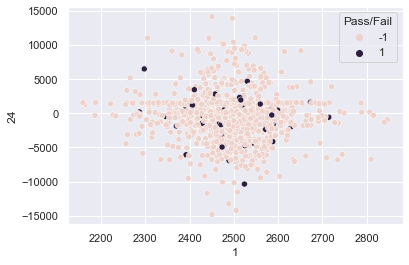

In [51]:
sns.scatterplot(x='1', y='24', data=df3, hue  = 'Pass/Fail')

##### No relation between the two and also it's not dependent on the target variable

<AxesSubplot:xlabel='72', ylabel='83'>

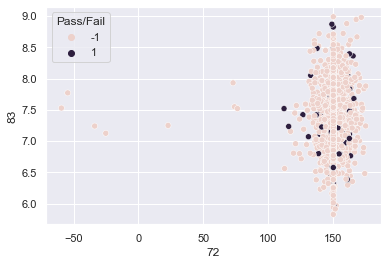

In [52]:
sns.scatterplot(x='72', y='83', data=df3, hue  = 'Pass/Fail')

##### Most of the distributions are cluttered around 150 value of variable 72...Observations have varied values of 83 but that doesn't affect varaible 72

<AxesSubplot:xlabel='15', ylabel='18'>

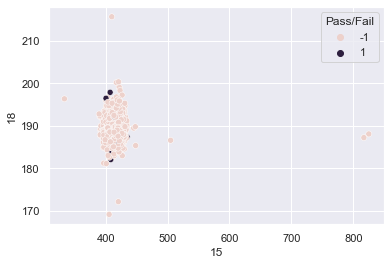

In [53]:
sns.scatterplot(x='15', y='18', data=df3, hue  = 'Pass/Fail')

##### No relation between the two and also no change with target variable values

## 4. Data pre-processing: 

In [54]:
#4.A
Predictors = df4
Target = df3['Pass/Fail']

In [55]:
df4.shape

(1547, 151)

In [56]:
df3.shape

(1547, 286)

##### 4.B
Let's perform split before balancing

In [57]:
df3['Pass/Fail'].value_counts(normalize = True)

-1   0.93
 1   0.07
Name: Pass/Fail, dtype: float64

##### imbalanced dataset with only 7% of 1

In [58]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(Predictors, Target, test_size=test_size, random_state=seed)
type(X_train)

pandas.core.frame.DataFrame

##### SMOTE

In [59]:
from imblearn.over_sampling import SMOTE

In [60]:
#4.b
print("Before UpSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label '-1': {} \n".format(sum(y_train==-1)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())


print("After UpSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After UpSampling, counts of label '-1': {} \n".format(sum(y_train_res==-1)))



print('After UpSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

Before UpSampling, counts of label '1': 73
Before UpSampling, counts of label '-1': 1009 

After UpSampling, counts of label '1': 1009
After UpSampling, counts of label '-1': 1009 

After UpSampling, the shape of train_X: (2018, 151)
After UpSampling, the shape of train_y: (2018,) 



##### Alternative tech SMOTETomek

In [61]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(sampling_strategy='auto')
X_smt, y_smt = smt.fit_resample(X_train, y_train)
X_smt.shape

(2016, 151)

In [62]:
print("After UpSampling, counts of label '1': {}".format(sum(y_smt==1)))
print("After UpSampling, counts of label '-1': {} \n".format(sum(y_smt==-1)))

After UpSampling, counts of label '1': 1008
After UpSampling, counts of label '-1': 1008 



In [63]:
#4.C
#train test split already done in above step
#
# standardising the data

#if we standardize the split data it and then work
from sklearn.preprocessing import MinMaxScaler

#STANDARDISING THE SMOTE SAMPLE
scaler = MinMaxScaler()
X_train_scaled_SMOTE = scaler.fit_transform(X_train_res)
X_test_scaled_SMOTE = scaler.transform(X_test)

In [64]:
#STANDARDISING THE SMOTETOMEK SAMPLE
scaler = MinMaxScaler()
X_train_scaled_SMOTET = scaler.fit_transform(X_smt)
X_test_scaled_SMOTET = scaler.transform(X_test)

In [65]:
#standardising the original datset
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
#4.D

In [67]:
type(y_train_res)

numpy.ndarray

In [68]:
type(y_smt)

pandas.core.series.Series

In [69]:
import numpy as np
unique, counts = np.unique(y_train_res, return_counts=True)

print ((unique, counts))

(array([-1,  1]), array([1009, 1009]))


In [70]:
import numpy as np
unique, counts = np.unique(y_smt, return_counts=True)

print ((unique, counts))

(array([-1,  1]), array([1008, 1008]))


In [71]:
X_train_scaled_SMOTE_df = pd.DataFrame(X_train_scaled_SMOTE)

In [72]:
X_train_scaled_SMOTE_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150
0,0.43,0.07,0.30,0.29,0.36,0.50,0.45,0.36,0.60,0.47,0.46,0.39,0.65,0.41,0.58,0.47,0.93,0.48,0.46,0.42,0.46,0.41,0.47,0.43,0.52,0.62,0.02,0.48,0.60,0.20,0.56,0.38,0.91,0.48,0.54,0.33,0.34,0.25,0.54,0.56,0.15,0.38,0.44,0.61,0.49,0.57,0.00,0.00,0.56,0.39,0.29,0.69,0.82,0.65,0.32,0.78,0.80,0.28,0.49,0.90,0.57,0.36,0.45,0.24,0.40,0.06,0.49,0.10,0.10,0.25,0.19,0.31,0.41,0.49,0.21,0.36,0.16,0.20,0.46,0.15,0.67,0.59,0.55,0.49,0.30,0.76,0.65,0.57,0.36,0.20,0.59,0.30,0.44,0.89,0.28,0.49,0.38,0.12,0.42,0.19,0.22,0.27,0.19,0.24,0.26,0.05,0.84,0.89,0.88,0.29,0.20,0.31,0.07,0.24,0.15,0.34,0.34,0.70,0.21,0.70,0.24,0.79,0.00,0.90,0.75,0.55,0.16,0.00,0.44,0.28,0.75,0.50,0.29,0.37,0.51,0.39,0.25,0.45,0.76,0.23,0.00,0.30,0.69,0.44,0.41,0.55,0.27,0.61,0.60,0.16,0.26
1,0.51,0.10,0.66,0.35,0.37,0.01,0.42,0.26,0.22,0.44,0.43,0.51,0.48,0.37,0.49,0.27,0.96,0.53,0.67,0.53,0.76,0.45,0.67,0.28,0.39,0.65,0.53,0.42,0.25,0.61,0.35,0.32,0.31,0.56,0.36,0.75,0.37,0.35,0.47,0.37,0.51,0.38,0.63,0.14,0.47,0.58,0.00,0.00,0.46,0.53,0.24,0.18,0.54,0.46,0.08,0.28,0.49,0.76,0.72,0.89,0.41,0.87,0.85,0.31,0.89,0.15,0.34,0.08,0.38,0.52,0.62,0.54,0.75,0.72,0.77,0.76,0.47,0.10,0.63,0.34,0.58,1.00,0.20,0.42,0.75,0.43,0.65,0.98,0.57,0.47,0.32,0.43,0.94,0.00,0.53,0.09,0.38,0.09,0.29,0.47,0.40,0.48,0.47,0.65,0.15,0.73,0.69,0.42,0.55,0.00,0.14,0.13,0.00,0.13,0.00,0.90,0.00,0.46,0.45,0.48,0.32,0.67,0.46,0.25,0.00,0.19,0.97,0.00,0.50,0.57,0.10,0.24,0.56,0.37,0.28,0.37,0.19,0.12,0.34,0.62,0.34,0.01,0.39,0.53,0.45,0.32,0.55,0.36,0.60,0.47,0.33
2,0.61,0.51,0.27,0.13,0.42,0.55,0.41,0.72,0.77,0.57,0.40,0.85,0.43,0.47,0.59,0.51,0.96,0.53,0.47,0.64,0.30,0.48,0.71,0.45,0.59,0.38,0.71,0.35,0.58,0.44,0.62,0.93,0.72,0.44,0.64,0.46,0.64,0.49,0.66,0.44,0.48,0.38,0.79,0.59,0.59,0.61,0.00,0.00,0.69,0.55,0.22,0.54,0.54,0.65,0.63,0.59,0.54,0.09,0.45,0.41,0.26,0.21,0.55,0.77,0.24,0.47,0.34,0.53,0.60,0.33,0.52,0.46,0.61,0.45,0.45,0.33,0.43,0.63,0.50,0.40,0.51,0.45,0.04,0.51,0.42,0.72,0.65,0.54,0.43,0.38,0.31,0.41,0.00,0.00,0.53,0.10,0.22,0.63,0.12,0.49,0.79,0.58,0.55,0.72,0.41,0.00,0.35,0.50,0.10,0.00,0.17,0.15,0.06,0.00,0.15,0.00,0.28,0.48,0.39,0.99,0.15,0.00,0.86,0.20,0.00,0.23,0.62,0.00,0.10,0.90,0.08,0.17,0.53,0.16,0.20,0.65,0.22,0.24,0.52,0.75,0.08,0.57,0.78,0.36,0.48,0.34,0.68,0.19,0.60,0.31,0.18
3,0.58,0.91,0.72,0.35,0.21,0.93,0.50,0.27,0.40,0.53,0.49,0.65,0.46,0.41,0.25,0.36,0.93,0.38,0.62,0.58,0.13,0.42,0.31,0.30,0.66,0.39,0.52,0.44,0.38,0.57,0.60,0.70,0.39,0.48,0.45,0.64,0.64,0.44,0.54,0.29,0.38,0.38,0.36,0.72,0.37,0.71,0.00,0.00,0.49,0.00,0.36,0.37,0.36,0.08,0.61,0.26,0.49,0.43,0.86,0.66,0.39,0.31,0.61,0.10,0.35,0.24,0.21,0.64,0.08,0.40,0.29,0.43,0.28,0.37,0.68,0.92,0.74,0.43,0.61,0.21,0.67,0.37,0.26,0.53,0.60,0.32,0.65,0.38,0.76,0.44,0.53,0.48,0.12,0.00,0.15,0.49,0.60,0.55,0.10,0.22,0.95,0.23,0.50,0.59,0.36,0.75,0.44,0.38,0.23,0.00,0.23,0.00,0.08,0.59,0.08,0.31,0.34,0.57,0.58,0.99,0.64,0.00,0.28,0.43,0.63,0.10,0.41,0.00,0.38,0.39,0.63,0.41,0.18,0.37,0.80,0.10,0.06,0.39,0.41,0.44,0.12,0.57,0.37,0.37,0.54,0.35,0.35,0.11,0.60,0.44,0.29
4,0.12,0.46,0.51,0.25,0.41,0.62,0.38,0.51,0.38,0.37,0.41,0.81,0.41,0.36,0.38,0.11,0.94,0.47,0.67,0.42,0.46,0.35,0.47,0.43,0.59,0.72,0.58,0.88,0.28,0.64,0.28,0.31,0.44,0.31,0.47,0.61,0.28,0.64,0.35,0.53,0.60,0.38,0.95,0.27,0.52,0.59,0.00,0.00,0.56,0.40,0.18,0.56,0.49,0.54,0.58,0.64,0.59,0.42,0.31,0.24,0.72,0.34,0.48,0.40,0.40,0.57,0.25,0.36,0.65,0.33,0.62,0.43,0.44,0.56,0.25,0.49,0.52,0.18,0.42,0.12,0.53,0.73,0.46,0.04,0.47,0.47,0.65,0.73,0.21,0.46,0.75,0.18,0.33,0.00,0.36,

In [73]:
X_train_scaled_SMOTE_df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,2018.00,0.46,0.16,0.00,0.34,0.45,0.57,1.00
1,2018.00,0.50,0.17,0.00,0.40,0.51,0.61,1.00
2,2018.00,0.50,0.16,0.00,0.38,0.50,0.61,1.00
3,2018.00,0.38,0.17,0.00,0.25,0.35,0.49,1.00
4,2018.00,0.38,0.20,0.00,0.23,0.39,0.51,1.00
5,2018.00,0.51,0.16,0.00,0.42,0.52,0.61,1.00
6,2018.00,0.50,0.16,0.00,0.39,0.48,0.62,1.00
7,2018.00,0.45,0.18,0.00,0.33,0.45,0.57,1.00
8,2018.00,0.49,0.17,0.00,0.36,0.47,0.60,1.00
9,2018.00,0.52,0.17,0.00,0.40,0.51,0.63,1.00


In [74]:
X_test_scaled_SMOTE_df = pd.DataFrame(X_test_scaled_SMOTE)

In [75]:
X_test_scaled_SMOTE_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150
0,0.46,0.51,0.70,0.38,0.17,0.78,0.34,0.56,0.67,0.13,0.41,0.80,0.18,0.79,0.50,0.63,0.53,0.80,0.51,0.47,0.14,0.16,0.47,0.63,0.15,0.70,0.62,0.48,0.31,0.37,0.44,0.36,0.61,0.41,0.69,0.37,0.51,0.52,0.59,0.46,0.72,0.38,0.58,0.41,0.20,0.58,0.00,0.00,0.26,0.61,0.39,0.30,0.39,0.46,0.48,0.37,0.32,0.78,0.38,0.23,0.39,0.45,0.26,0.34,0.62,0.30,0.21,0.03,0.00,0.95,0.14,0.38,0.59,0.10,0.37,0.39,0.42,0.34,0.85,0.58,0.22,0.42,0.38,0.53,0.45,0.40,0.65,0.47,0.59,0.37,0.41,0.29,0.40,0.77,0.26,0.46,0.50,0.03,0.00,0.78,0.79,0.13,0.46,0.55,0.53,0.00,0.23,0.98,0.20,0.00,0.04,0.14,0.12,0.79,0.19,0.00,0.00,0.65,0.10,0.18,0.36,0.00,0.49,0.27,0.00,0.13,0.40,0.00,0.36,0.20,0.47,0.69,0.14,0.37,0.43,0.49,0.40,0.43,0.52,0.57,0.26,0.72,0.93,0.46,0.91,0.40,0.01,0.30,0.60,0.71,0.46
1,0.53,0.60,0.46,0.34,0.84,0.65,0.27,0.70,0.74,0.42,0.29,0.83,0.51,0.44,0.22,0.31,0.93,0.83,0.15,0.26,0.23,0.55,0.26,0.35,0.32,0.33,0.62,0.97,0.21,0.88,0.48,0.70,0.18,0.37,0.20,0.93,0.42,0.56,0.33,0.57,0.63,0.38,0.44,0.52,0.50,0.40,0.00,0.00,0.63,0.87,0.67,0.67,0.34,0.56,0.59,0.84,0.53,0.31,0.72,0.58,0.51,0.75,0.39,0.92,0.08,0.57,0.51,0.47,0.39,0.45,0.33,0.35,0.56,0.40,0.30,0.71,0.91,0.46,0.47,0.27,0.67,0.27,0.75,0.55,0.55,0.46,0.65,0.27,0.24,0.25,1.00,0.47,0.00,0.00,0.68,0.26,0.46,0.39,0.36,0.49,0.43,0.46,0.33,0.40,0.39,0.34,0.68,0.27,0.25,0.41,0.85,0.11,0.00,0.00,0.28,0.30,0.30,0.37,0.39,0.31,0.50,0.00,0.00,0.38,0.00,0.55,0.14,0.00,0.42,0.41,0.23,0.17,0.56,0.12,0.64,0.47,0.28,0.65,0.50,0.37,0.20,0.58,0.60,0.47,0.79,0.45,0.40,0.54,0.60,0.67,0.56
2,0.73,0.44,0.55,0.12,0.42,0.69,0.34,0.64,0.15,0.81,0.31,0.51,0.31,0.40,0.51,0.49,0.93,0.41,0.70,0.46,0.59,0.40,0.17,0.00,0.67,0.40,0.55,0.56,0.40,0.43,0.30,0.34,0.39,0.41,0.62,0.43,0.53,0.52,0.63,0.34,0.40,0.38,0.59,0.50,0.39,0.49,0.00,0.00,0.31,0.35,0.37,0.30,0.52,0.52,0.57,0.75,0.46,0.48,0.67,0.73,0.40,0.52,0.37,0.53,0.48,0.36,0.17,0.25,0.10,0.50,0.29,0.43,0.54,0.61,0.45,0.74,0.54,0.06,0.43,0.19,0.53,0.19,0.34,0.28,0.27,0.26,0.65,0.25,0.67,0.05,0.62,0.17,0.00,0.00,0.39,0.11,0.63,0.00,0.59,0.20,0.20,0.14,0.48,0.44,0.06,0.52,0.44,0.15,0.37,0.19,0.33,0.41,0.13,0.85,0.00,0.00,0.29,0.30,0.41,0.17,0.76,0.85,0.00,0.42,0.00,0.33,0.66,0.00,0.41,0.31,0.72,0.83,0.26,0.37,0.58,0.68,0.42,0.71,0.45,0.39,0.61,0.57,0.51,0.53,0.41,0.49,0.66,0.48,0.60,1.00,0.33
3,0.16,0.53,0.56,0.34,0.69,0.34,0.81,0.24,0.44,0.60,0.77,0.61,0.57,0.33,0.84,0.92,0.92,0.53,0.39,0.43,0.74,0.42,0.29,0.19,0.61,0.52,0.62,0.48,0.47,0.61,0.53,0.75,0.43,0.41,0.46,0.64,0.66,0.52,0.72,0.34,0.50,0.38,0.51,0.45,0.79,0.91,0.00,0.00,0.76,0.71,0.22,0.46,0.48,0.67,0.62,0.41,0.51,0.55,0.10,0.20,0.44,0.52,0.74,0.18,0.46,0.36,0.41,0.35,0.66,0.22,0.57,0.43,0.48,0.57,0.55,0.88,0.91,0.45,0.53,0.26,0.64,0.39,0.45,0.59,0.42,0.58,0.65,0.55,0.03,0.25,0.51,0.41,0.00,0.97,0.33,0.48,0.28,0.60,0.32,0.58,0.24,0.55,0.60,0.31,0.35,0.19,0.42,0.23,0.34,0.29,0.49,0.32,0.18,0.00,0.40,0.16,0.49,0.62,0.63,0.05,0.29,0.00,0.00,0.44,0.00,0.55,0.37,0.00,0.30,0.85,0.62,0.59,0.46,0.37,0.27,0.48,0.56,0.04,0.52,0.61,0.05,0.81,0.58,0.31,0.36,0.63,0.62,0.29,0.60,0.33,0.69
4,0.33,0.35,0.23,0.23,0.09,0.49,0.59,0.56,0.43,0.38,0.60,0.57,0.49,0.38,0.50,0.57,0.93,0.50,0.62,0.41,0.60,0.30,0.46,0.38,0.53,0.45,0.61,0.61,0.37,0.48,0.72,0.33,0.68,0.45,0.59,0.52,0.47,0.48,0.45,0.62,0.09,0.38,0.52,0.50,0.40,0.47,0.00,0.00,0.37,0.55,0.45,0.28,0.40,0.50,0.58,0.51,0.32,0.33,0.17,0.36,0.35,0.38,0.54,0.45,0.90,0.62,0.32,0.20,0.03,0.37,0.57,0.23,0.76,0.25,0.30,0.47,0.41,0.18,0.34,0.14,0.81,0.85,0.61,0.49,0.43,0.19,0.65,0.24,0.53,0.46,0.71,0.26,0.00,0.00,0.37,

In [76]:
#SMOTE
print("Training Fail    : {0} ({1:0.2f}%)".format(len(y_train_res[y_train_res[:] == 1]), (len(y_train_res[y_train_res[:] == 1])/len(y_train_res)) * 100))
print("Training Pass  : {0} ({1:0.2f}%)".format(len(y_train_res[y_train_res[:] == -1]), (len(y_train_res[y_train_res[:] == -1])/len(y_train_res)) * 100))
print("")
print("Test Fail        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Pass       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == -1]), (len(y_test[y_test[:] == -1])/len(y_test)) * 100))
print("")

Training Fail    : 1009 (50.00%)
Training Pass  : 1009 (50.00%)

Test Fail        : 31 (6.67%)
Test Pass       : 434 (93.33%)



In [77]:
#SMOTETOMEK
print("Training Fail    : {0} ({1:0.2f}%)".format(len(y_smt[y_smt[:] == 1]), (len(y_smt[y_smt[:] == 1])/len(y_smt)) * 100))
print("Training Pass  : {0} ({1:0.2f}%)".format(len(y_smt[y_smt[:] == -1]), (len(y_smt[y_smt[:] == -1])/len(y_smt)) * 100))
print("")
print("Test Fail        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Pass       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == -1]), (len(y_test[y_test[:] == -1])/len(y_test)) * 100))
print("")

Training Fail    : 1008 (50.00%)
Training Pass  : 1008 (50.00%)

Test Fail        : 31 (6.67%)
Test Pass       : 434 (93.33%)



In [78]:
X_train_scaled_SMOTET_df = pd.DataFrame(X_train_scaled_SMOTET)

In [79]:
X_test_scaled_SMOTET_df = pd.DataFrame(X_test_scaled_SMOTET)

In [80]:
X_train_scaled_SMOTET_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150
count,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00
mean,0.46,0.51,0.50,0.38,0.39,0.51,0.49,0.46,0.49,0.52,0.49,0.51,0.49,0.49,0.48,0.50,0.85,0.46,0.51,0.45,0.47,0.47,0.47,0.43,0.50,0.53,0.61,0.47,0.40,0.46,0.53,0.53,0.48,0.51,0.52,0.48,0.51,0.47,0.50,0.49,0.48,0.39,0.50,0.50,0.48,0.50,0.00,0.00,0.50,0.48,0.42,0.42,0.41,0.50,0.59,0.52,0.46,0.41,0.40,0.41,0.51,0.42,0.46,0.40,0.41,0.38,0.42,0.29,0.21,0.45,0.43,0.40,0.47,0.42,0.38,0.57,0.43,0.37,0.53,0.33,0.52,0.45,0.48,0.44,0.48,0.43,0.64,0.44,0.39,0.48,0.49,0.36,0.30,0.32,0.41,0.38,0.38,0.27,0.26,0.40,0.41,0.35,0.45,0.44,0.41,0.22,0.47,0.43,0.35,0.31,0.31,0.27,0.25,0.32,0.22,0.34,0.34,0.47,0.37,0.23,0.36,0.25,0.24,0.48,0.29,0.45,0.42,0.00,0.34,0.46,0.37,0.50,0.37,0.42,0.41,0.51,0.41,0.37,0.52,0.51,0.33,0.54,0.51,0.50,0.54,0.53,0.43,0.42,0.61,0.44,0.35
std,0.17,0.17,0.16,0.17,0.20,0.16,0.16,0.18,0.17,0.17,0.15,0.17,0.19,0.18,0.18,0.16,0.17,0.18,0.17,0.11,0.18,0.19,0.15,0.18,0.20,0.17,0.16,0.17,0.17,0.17,0.18,0.27,0.21,0.15,0.19,0.17,0.17,0.18,0.14,0.18,0.16,0.13,0.16,0.17,0.16,0.16,0.00,0.00,0.16,0.17,0.19,0.17,0.19,0.17,0.15,0.16,0.18,0.18,0.20,0.18,0.18,0.16,0.17,0.20,0.18,0.17,0.16,0.20,0.25,0.17,0.18,0.14,0.17,0.17,0.17,0.16,0.19,0.19,0.14,0.20,0.17,0.17,0.19,0.18,0.17,0.18,0.04,0.18,0.20,0.18,0.16,0.17,0.26,0.29,0.19,0.22,0.17,0.20,0.24,0.19,0.19,0.19,0.17,0.19,0.18,0.22,0.18,0.16,0.19,0.27,0.20,0.22,0.22,0.25,0.23,0.23,0.22,0.17,0.18,0.20,0.17,0.30,0.30,0.16,0.31,0.16,0.20,0.00,0.14,0.18,0.24,0.19,0.20,0.16,0.19,0.15,0.24,0.19,0.17,0.18,0.22,0.13,0.18,0.16,0.16,0.16,0.17,0.17,0.06,0.16,0.20
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.34,0.40

In [81]:
X_test_scaled_SMOTET_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150
count,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00
mean,0.47,0.51,0.52,0.39,0.40,0.53,0.48,0.48,0.50,0.50,0.49,0.51,0.48,0.49,0.50,0.51,0.82,0.52,0.52,0.42,0.44,0.43,0.48,0.44,0.49,0.53,0.62,0.47,0.38,0.48,0.52,0.54,0.46,0.46,0.51,0.50,0.48,0.48,0.49,0.50,0.49,0.40,0.50,0.51,0.51,0.51,0.00,0.00,0.51,0.50,0.45,0.43,0.40,0.48,0.56,0.50,0.45,0.42,0.39,0.39,0.49,0.42,0.47,0.40,0.41,0.36,0.39,0.27,0.18,0.48,0.42,0.41,0.50,0.42,0.39,0.57,0.42,0.37,0.52,0.33,0.50,0.44,0.48,0.47,0.47,0.44,0.64,0.44,0.38,0.47,0.49,0.41,0.34,0.34,0.40,0.35,0.39,0.26,0.22,0.38,0.40,0.33,0.46,0.42,0.39,0.25,0.49,0.44,0.34,0.31,0.30,0.28,0.24,0.29,0.25,0.34,0.31,0.45,0.37,0.23,0.39,0.26,0.26,0.45,0.27,0.44,0.41,0.00,0.37,0.45,0.38,0.50,0.38,0.41,0.41,0.50,0.39,0.36,0.50,0.51,0.30,0.55,0.50,0.50,0.53,0.50,0.44,0.42,0.60,0.46,0.36
std,0.18,0.17,0.17,0.21,0.20,0.18,0.17,0.19,0.20,0.19,0.16,0.19,0.21,0.21,0.18,0.15,0.19,0.21,0.20,0.12,0.21,0.20,0.17,0.20,0.21,0.19,0.16,0.17,0.18,0.18,0.18,0.27,0.21,0.15,0.18,0.18,0.16,0.17,0.14,0.18,0.18,0.13,0.18,0.19,0.18,0.18,0.00,0.00,0.19,0.18,0.19,0.19,0.20,0.18,0.17,0.18,0.21,0.19,0.20,0.20,0.18,0.19,0.19,0.21,0.20,0.19,0.18,0.22,0.23,0.19,0.19,0.16,0.19,0.19,0.19,0.17,0.21,0.21,0.16,0.22,0.17,0.18,0.19,0.19,0.18,0.21,0.05,0.20,0.20,0.20,0.18,0.19,0.30,0.34,0.21,0.21,0.19,0.21,0.24,0.19,0.19,0.21,0.17,0.20,0.21,0.25,0.18,0.19,0.20,0.28,0.21,0.24,0.23,0.29,0.28,0.25,0.24,0.19,0.21,0.22,0.20,0.32,0.33,0.18,0.33,0.17,0.19,0.00,0.16,0.19,0.28,0.22,0.22,0.20,0.21,0.18,0.25,0.22,0.18,0.18,0.22,0.15,0.17,0.18,0.18,0.17,0.19,0.20,0.07,0.18,0.20
min,0.01,0.01,0.07,0.00,0.03,0.01,-0.03,0.04,-0.03,0.00,0.02,0.00,-0.01,-0.02,0.02,-0.00,0.01,-0.03,-0.03,0.08,0.01,0.00,0.00,0.00,-0.11,0.00,0.00,0.00,0.01,-0.05,0.05,0.01,0.00,-0.01,0.00,0.01,0.07,0.02,-0.00,-0.01,0.00,0.01,0.04,0.00,0.01,0.03,0.00,0.00,0.00,-0.00,-0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.03,0.01,0.11,0.13,-0.02,0.03,-0.02,0.02,0.03,0.00,0.00,0.05,0.00,0.00,0.04,0.06,-0.01,0.01,-0.06,0.02,0.00,0.02,0.00,0.11,-0.02,-0.04,0.05,-0.03,0.07,0.01,0.00,0.00,0.00,-0.05,0.00,0.00,-0.01,0.00,0.03,0.00,0.00,-0.12,-0.02,-0.01,0.00,-0.03,-0.00,0.00,0.03,0.13,-0.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.01,0.00,0.06,0.00,0.00,0.11,0.00,0.00,-0.00,0.00,0.03,0.03,0.00,0.01,0.01,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.00,0.03,0.06,0.01,0.03,0.02,0.01,-0.08,-0.02,0.07,0.00
25%,0.37,0.41,0.41,0.23,0.23,0.42,0.36,0.35,0.38,0.38,0.38,0.40,0.28,0.36,0.42,0.43,0.55,0.40,0.39,0.35,0.27,0.30,0.35,0.31,0.35,0.4

In [82]:
#Original dataset properties
df4.describe()

,0,1,2,3,4,6,12,14,15,16,18,19,21,22,23,24,27,28,29,31,32,33,34,35,37,38,40,41,43,45,48,51,55,59,61,62,63,64,67,68,71,72,83,88,90,96,110,111,115,117,122,125,126,128,129,133,134,135,136,137,138,139,142,150,151,159,160,161,162,166,167,177,180,181,182,183,185,188,195,198,200,201,208,218,223,225,245,250,268,269,416,417,418,419,423,426,429,432,433,438,439,440,442,456,460,468,472,474,476,482,483,484,485,486,487,488,489,491,493,494,496,499,500,510,511,519,520,521,523,525,526,527,539,545,546,547,548,549,550,551,561,562,564,569,570,571,572,573,581,585,589
count,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00,1547.00
mean,3009.86,2497.17,2201.08,1346.95,1.30,101.44,199.89,8.93,412.48,9.86,190.04,12.50,-5665.03,2713.04,-3847.80,-217.68,6.74,69.51,2.38,3.41,85.12,8.80,50.40,64.18,66.21,86.78,78.26,3.05,355.49,136.56,140.01,157.39,2855.95,0.60,10.44,116.48,13.30,19.98,0.98,147.57,99.28,150.51,7.46,1810.32,8815.83,0.01,101.34,231.76,749.15,58.56,3.86,1.16,2.73,3.19,-0.20,1004.33,39.18,109.17,138.30,122.70,57.14,365.97,6.29,6.44,11.27,646.10,445.45,3019.95,3003.71,2.66,1.20,0.29,18.93,0.54,10.58,26.68,6.94,43.09,0.26,0.51,17.22,7.23,72.15,3.70,119.87,1002.39,1.69,105.56,19.52,3.68,3.39,7.30,320.10,310.66,74.11,1.17,3.61,70.48,177.13,51.55,67.50,11.51,1.24,11.56,27.65,196.88,136.01,34.04,17.17,318.25,161.48,172.45,155.65,302.10,221.33,352.54,242.64,2.25,2.51,0.31,23.32,262.65,241.71,48.73,275.68,9.31,2.23,0.00,0.10,5.21,1.43,6.39,3.02,7.30,1.01,403.76,75.54,0.56,16.86,1.15,31.90,263.99,6.08,19.31,532.71,2.14,8.64,0.29,97.67,2.78,75.71
std,60.92,59.92,25.78,334.56,0.33,4.42,2.47,2.71,8.48,0.41,2.51,0.06,441.94,197.23,734.91,1899.72,1.04,3.41,0.39,0.07,0.89,0.34,0.20,0.23,0.20,0.29,3.19,0.53,6.13,7.43,4.40,60.98,25.19,3.83,0.22,6.15,4.10,3.83,0.10,3.43,19.75,0.97,0.50,47.99,344.90,0.15,0.00,0.00,40.95,0.81,0.83,0.24,0.19,0.17,0.64,6.07,2.56,23.59,53.87,51.72,8.57,161.97,1.73,2.64,4.22,322.10,202.09,2296.38,3752.46,0.75,0.40,0.09,3.06,0.20,3.61,6.55,2.14,21.19,0.05,0.29,4.24,2.93,26.25,1.05,33.14,359.85,0.01,38.55,7.35,0.99,0.90,2.21,287.63,325.30,25.27,0.50,1.39,55.74,180.80,20.09,24.87,6.14,0.46,3.69,10.24,191.10,43.88,14.28,7.65,280.57,115.78,145.38,150.26,286.54,241.92,251.70,185.78,0.70,0.93,0.26,9.52,324.38,323.00,18.59,329.85,3.67,0.95,0.00,0.03,1.57,0.91,1.86,1.25,0.65,0.29,4.12,2.92,0.31,2.56,0.32,18.46,1.61,1.66,5.32,2.46,0.21,1.66,0.08,1.18,0.64,44.36
min,2846.07,2323.34,2126.66,711.03,0.68,88.47,192.52,2.25,389.47,8.74,182.59,12.34,-6736.00,2199.50,-5903.75,-5804.00,2.19,60.24,1.27,3.13,83.18,8.08,49.83,63.68,65.59,85.96,65.34,1.58,342.75,115.30,127.67,40.26,2801.00,-11.22,9.83,99.05,1.66,9.76,0.64,138.28,45.47,147.49,6.06,1681.45,7869.70,-0.40,101.34,231.76,638.47,56.26,1.88,0.61,2.34,2.75,-2.32,987.29,33.37,58.00,36.10,19.20,34.50,0.00,1.81,1.34,2.02,0.00,0.00,0.00,0.00,0.80,0.30,0.05,10.90,0.09,3.17,5

In [83]:
df4.shape

(1547, 151)

We can compare the variables 5 point summary of original v/s SMOTE dataset

## 5. Model training, testing and tuning: 

In [84]:
#5.A
# Import DecisionTreeRegressor machine learning library
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0, max_depth=3)

# First fitting it on the balanced dataset (SMOTE)
regressor.fit(X_train_scaled_SMOTE_df , y_train_res)

#to get important features
feature_importances = regressor.feature_importances_


feature_names = df4.columns
print(feature_names)

k = 50

print(feature_importances)
top_k_idx = (feature_importances.argsort()[-k:][::-1])

print(feature_names[top_k_idx], feature_importances)

Index(['0', '1', '2', '3', '4', '6', '12', '14', '15', '16',
       ...
       '562', '564', '569', '570', '571', '572', '573', '581', '585', '589'],
      dtype='object', length=151)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.30374962 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.02493346 0.
 0.01173248 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.  

In [85]:
print(feature_names[top_k_idx])

Index(['486', '33', '419', '167', '484', '571', '180', '110', '125', '122',
       '117', '115', '111', '589', '96', '90', '126', '83', '72', '71', '68',
       '88', '128', '64', '129', '166', '162', '161', '160', '159', '151',
       '150', '142', '139', '138', '137', '136', '135', '134', '133', '67',
       '62', '63', '15', '23', '22', '21', '19', '18', '16'],
      dtype='object')


In [86]:
y_pred = regressor.predict(X_test_scaled)

In [87]:
#loading required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import binarize
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold,cross_val_score,KFold
from imblearn.over_sampling import SMOTE,ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn import metrics
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns',None)
pd.set_option('max_rows',None)

In [88]:
#trying another supervised learning model XGB

In [89]:
xgb = XGBClassifier(verbosity=0)
xgb.fit(X_train_scaled_SMOTE_df, y_train_res)

XGBClassifier(verbosity=0)

In [90]:
modelxgb_score = xgb.score(X_train_scaled_SMOTE_df, y_train_res)
print('Accuracy Score of Training Data: ', modelxgb_score)

Accuracy Score of Training Data:  0.998017839444995


In [91]:
y_predictxgb= xgb.predict(X_test_scaled_SMOTE_df)
modelxgb_score = accuracy_score(y_test, y_predictxgb)
print('Accuracy Score of Test Data:', modelxgb_score)

Accuracy Score of Test Data: 0.9032258064516129


In [92]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(y_test, y_predictxgb, labels=[-1, 1]))

Classification Report
              precision    recall  f1-score   support

          -1       0.95      0.95      0.95       434
           1       0.28      0.29      0.29        31

    accuracy                           0.90       465
   macro avg       0.62      0.62      0.62       465
weighted avg       0.90      0.90      0.90       465



In [93]:
#5.B Cross validation techniques

#1. kFOLD

from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np


num_folds = 50
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
model = XGBClassifier(verbosity=0)
results = cross_val_score(model, X_train_scaled_SMOTE_df, y_train_res, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.97560976 0.95121951 0.87804878 0.87804878 0.80487805 0.75609756
 0.85365854 0.85365854 0.87804878 0.90243902 0.85365854 0.85365854
 0.80487805 0.82926829 0.82926829 0.90243902 0.85365854 0.90243902
 0.925      0.75       0.85       0.9        0.875      0.85
 0.925      0.9        0.975      0.85       0.95       0.875
 0.8        0.85       0.875      0.75       0.775      0.875
 0.875      0.875      0.95       0.825      0.825      0.85
 0.875      0.925      0.8        0.925      0.8        0.85
 0.875      0.85      ]
Accuracy: 86.422% (5.345%)


In [94]:
#5.C
#checking on logistic model first
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : [1,2,4],
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

lg=LogisticRegression()

log = GridSearchCV(lg, param_grid = param_grid, cv = 5, verbose=2, n_jobs=-1)
log.fit(X_train_scaled_SMOTE_df, y_train_res)
log.best_estimator_

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


LogisticRegression(C=1, penalty='none', solver='newton-cg')

In [95]:
lg=LogisticRegression(C=1, penalty='none', solver='newton-cg')
lg.fit(X_train_scaled_SMOTE_df, y_train_res)
modellg= lg.score(X_train_scaled_SMOTE_df, y_train_res)
print('Accuracy Score of Training Data: ', modellg)
y_predictlg= lg.predict(X_test_scaled_SMOTE_df)
modellg = accuracy_score(y_test, y_predictlg)
print('Accuracy Score of Test Data:', modellg)
#printing classification report
print("Classification Report")
print(metrics.classification_report(y_test, y_predictlg, labels=[1, -1]))

Accuracy Score of Training Data:  0.9301288404360754
Accuracy Score of Test Data: 0.7827956989247312
Classification Report
              precision    recall  f1-score   support

           1       0.10      0.29      0.15        31
          -1       0.94      0.82      0.88       434

    accuracy                           0.78       465
   macro avg       0.52      0.55      0.51       465
weighted avg       0.89      0.78      0.83       465



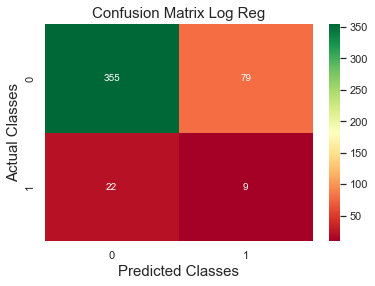

In [96]:
# visualizing confusion matrix
cm= confusion_matrix(y_test, y_predictlg)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix Log Reg', fontsize = 15);

In [97]:
#xgb
xgb_para = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
            "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
            "min_child_weight" : [ 1, 3, 5, 7 ],
            "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
            "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] 
           }

xgb = XGBClassifier()
xgb_hy = RandomizedSearchCV(estimator = xgb, param_distributions = xgb_para, cv = 5, verbose=2, random_state=25, n_jobs = -1)
xgb_hy.fit(X_train_scaled_SMOTE_df, y_train_res)
xgb_hy.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'min_child_weight': 1,
 'max_depth': 6,
 'learning_rate': 0.2,
 'gamma': 0.0,
 'colsample_bytree': 0.7}

In [98]:
xgb=XGBClassifier(min_child_weight=1,
 max_depth=6,
 learning_rate= 0.2,
 gamma= 0.0,
 colsample_bytree=0.7)

xgb.fit(X_train_scaled_SMOTE_df, y_train_res)
modelxgb_score=xgb.score(X_train_scaled_SMOTE_df, y_train_res)

print('Accuracy Score of Training Data: ', modelxgb_score)

#prediction on test
y_predictxg= xgb.predict(X_test_scaled_SMOTE_df)
modelxg_score = accuracy_score(y_test, y_predictxg)
print('Accuracy Score of Test Data:', modelxg_score)
#printing classification report
print("Classification Report")
print(metrics.classification_report(y_test, y_predictxg, labels=[1, -1]))

Accuracy Score of Training Data:  1.0
Accuracy Score of Test Data: 0.9247311827956989
Classification Report
              precision    recall  f1-score   support

           1       0.38      0.19      0.26        31
          -1       0.94      0.98      0.96       434

    accuracy                           0.92       465
   macro avg       0.66      0.59      0.61       465
weighted avg       0.91      0.92      0.91       465



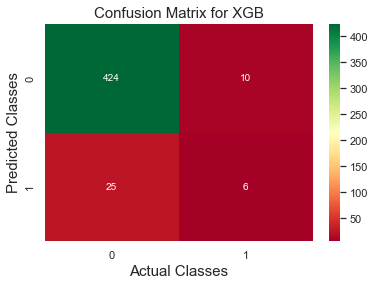

In [99]:
# visualizing confusion matrix
cm= confusion_matrix(y_test, y_predictxg)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for XGB', fontsize = 15);


##### Before Hyperparameter tuning the results were better so we would stick to xgb with out hyper parameter tuning

In [117]:
#5.D
#PCA

#Load the data and pre-processing for pca
com=pd.read_csv('signal-data.csv')
com=com.drop(['Time'],axis=1)

#dropping the columns the have constant signal
cols = com.select_dtypes([np.number]).columns
std = com[cols].std()
cols_to_drop = std[std==0].index
com.drop(cols_to_drop, axis=1,inplace=True)


#replacing the NaN/NA with zero and considering it as no signal
com.fillna(0,inplace=True)
row,column=com.shape
print('The dataset contains', row, 'rows and', column, 'columns')

The dataset contains 1567 rows and 475 columns


In [118]:
sg=com.iloc[0:1545,:]
y=sg['Pass/Fail']
sg=sg.drop(['Pass/Fail'],axis=1)
row,column=sg.shape
print('The main dataset contains', row, 'rows and', column, 'columns')

The main dataset contains 1545 rows and 474 columns


In [119]:
val=com.iloc[1545:1567,:]
val=val.drop(['Pass/Fail'],axis=1)
row,column=val.shape
print('The validation dataset contains', row, 'rows and', column, 'columns')

The validation dataset contains 22 rows and 474 columns


In [120]:
#scaling with z-score for better results
comScaled= com.apply(zscore)  

#dropping NaN
comScaled.dropna(axis=1,inplace=True)
comScaled=comScaled.drop(['Pass/Fail'],axis=1)

In [121]:
#splitting the dataset into train and validation set
X=comScaled.iloc[0:1545,:]
val=comScaled.iloc[1545:,:]
X.shape,val.shape

((1545, 474), (22, 474))

In [122]:
from sklearn.decomposition import PCA
#extracting componenets that explaint 95% of the variation
pca = PCA(.95)
pca_ = pca.fit_transform(X)
pca

PCA(n_components=0.95)

In [123]:
X_pca = pca.transform(X)  # PCAs for the train data
val_pca = pca.transform(val)    # PCAs for the test/validation data

X_pca.shape, val_pca.shape

((1545, 157), (22, 157))

In [124]:
pca.explained_variance_

array([26.28176601, 18.62530378, 14.30873409, 12.34697747, 10.01290161,
        9.44240918,  8.69056248,  8.2847263 ,  8.16480029,  7.3305419 ,
        6.98832691,  6.78197395,  6.58623361,  6.43484342,  6.23441649,
        6.05771301,  5.83598592,  5.64803947,  5.45794102,  5.33078262,
        5.18640579,  5.11554461,  4.93769578,  4.84485289,  4.78178173,
        4.57890843,  4.52248162,  4.50692951,  4.37174337,  4.28970165,
        4.23177809,  4.13669841,  3.87110965,  3.7882176 ,  3.7375571 ,
        3.65920362,  3.54340257,  3.46541691,  3.43194476,  3.36154208,
        3.34856488,  3.28318853,  3.21134158,  3.16072344,  3.09782102,
        3.07106455,  3.0116948 ,  2.98765178,  2.96286404,  2.89717392,
        2.80191693,  2.76137783,  2.74076634,  2.70377991,  2.66116291,
        2.64696576,  2.57346897,  2.54020416,  2.47345525,  2.43227052,
        2.40690687,  2.39722861,  2.31820967,  2.26955594,  2.23402703,
        2.21542788,  2.16644849,  2.13530177,  2.11189182,  2.08

In [125]:
#creating a dataframe of the componenets and combining it to the target class
pca_df = pd.DataFrame(data = X_pca)
df=pd.concat([pca_df,y],axis=1) #concat it with the target
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,Pass/Fail
0,-1.38,4.55,4.15,-0.14,-1.69,0.55,1.06,2.21,-0.01,0.28,2.06,0.55,0.89,-1.32,-0.45,-0.26,2.57,-3.52,2.66,-2.67,7.17,2.00,2.51,-2.45,-1.64,1.07,2.16,0.55,-3.11,0.13,-0.16,1.80,-3.47,-3.14,-5.51,-0.95,-1.11,0.55,-0.95,-0.08,0.14,-0.93,2.18,0.17,0.65,1.20,-0.87,-0.56,-1.58,0.07,1.37,1.03,-0.62,-1.40,3.47,0.15,-2.54,-0.23,1.67,3.11,0.93,0.58,-1.23,-0.52,0.34,-3.14,-0.02,2.30,-0.78,1.29,1.30,-1.31,0.62,-0.79,-0.89,0.32,-0.44,-4.23,-0.18,-0.54,-3.16,-1.57,1.06,-0.03,-1.13,0.54,-0.28,0.62,0.72,-1.03,-1.57,0.35,-0.66,2.05,0.36,0.25,-1.26,0.62,-0.48,-2.58,-0.77,1.00,-0.75,0.91,0.10,-0.58,0.47,1.07,0.13,-0.49,1.52,0.71,1.60,-0.50,-0.43,-0.51,0.03,-0.26,1.33,-0.03,-0.27,0.11,0.66,-0.17,0.04,-0.56,-0.71,-0.44,0.15,1.39,1.38,0.22,-0.22,0.46,-0.79,-1.53,-0.20,-0.08,0.42,-0.13,-0.69,1.14,0.44,-0.50,-1.05,0.72,0.84,1.27,0.46,0.02,0.92,-1.28,-1.21,-0.91,-0.44,-0.02,-0.83,-1
1,-1.95,2.69,3.53,-0.29,-2.58,-0.48,-0.17,3.69,-1.34,0.49,0.79,0.07,1.09,-3.42,-1.18,-0.51,2.10,-0.99,0.31,-3.54,3.46,2.53,1.02,-1.06,-0.16,-1.59,1.21,-1.51,-1.17,0.45,-1.02,3.19,2.05,-3.16,2.28,-1.20,0.79,-1.37,1.18,2.23,2.80,-1.22,0.56,1.79,1.33,0.83,0.26,1.28,0.69,0.13,1.73,-1.26,-2.12,2.24,1.29,-0.81,0.52,3.22,-2.76,0.05,2.09,-2.85,-4.05,-0.21,-0.16,0.13,0.08,0.80,1.80,1.42,-0.56,-0.54,1.24,0.47,0.17,1.19,0.29,0.27,0.36,0.14,1.03,1.09,-0.34,0.33,0.67,0.12,2.44,-1.39,-1.19,-0.21,1.29,1.18,-0.46,0.52,0.93,0.41,0.92,0.52,0.79,0.40,-0.90,0.66,-1.88,-0.95,1.03,1.09,-1.27,0.99,1.07,-1.79,1.33,-0.84,0.94,1.32,0.50,-0.18,-0.47,1.78,-0.32,-0.07,1.00,1.82,2.62,0.80,-1.19,-0.46,-0.87,0.76,-0.03,0.47,-0.11,0.33,0.51,0.15,0.82,-0.97,-0.90,0.34,-0.56,0.93,-0.10,1.12,0.09,-0.23,1.14,1.70,-0.65,-0.21,0.90,-1.24,-0.12,-1.06,0.02,0.26,-0.06,-0.93,0.60,-1
2,0.28,1.81,0.23,-0.23,-0.00,-1.04,-1.84,3.01,-0.35,1.67,0.39,1.08,-2.39,-0.35,2.22,-0.11,0.92,2.04,1.42,-1.65,-0.73,0.01,2.46,-2.56,0.60,-1.79,-5.48,-0.76,-4.29,2.53,-2.41,2.99,-0.85,1.96,1.90,1.34,1.93,3.10,-0.42,2.70,0.81,3.67,-4.17,-1.89,-0.85,1.52,1.93,-4.07,-0.65,-3.27,-0.75,0.89,-1.22,-0.04,0.63,-1.45,0.45,2.79,1.36,1.55,1.09,-1.16,-2.88,1.88,-0.04,0.03,1.74,0.32,0.02,0.53,0.82,-1.11,-0.18,2.82,0.08,0.30,-0.24,0.06,-0.35,-1.63,0.91,-2.06,0.35,-2.37,-1.73,1.98,-0.94,0.26,1.86,1.01,-0.53,1.29,1.41,-0.77,-2.06,-2.73,0.66,3.72,0.44,0.45,0.13,0.86,-0.54,-1.44,-0.51,-3.88,0.58,1.60,-0.20,1.64,-0.38,0.66,4.03,0.64,-2.65,0.45,-0.28,0.41,-1.17,-1.03,0.83,0.56,0.70,-1.80,0.43,0.77,-0.81,-0.76,-0.08,-0.96,-0.36,-0.35,1.41,-1.17,0.46,-0.56,0.48,1.14,-0.30,0.51,0.77,0.47,0.62,0.42,0.61,-0.75,0.54,1.33,-0.23,-0.45,0.39,-1.77,0.18,-1.09,-0.59,0.93,0.80,1
3,0.44,2.12,-2.74,3.36,-1.01,-11.50,-5.75,22.43,21.26,-0.94,-19.10,-3.68,0.48,-3.40,-3.93,6.60,1.36,-4.19,-1.54,-3.78,3.59,1.46,2.50,4.60,-1.20,-5.93,-2.88,-1.73,-1.83,9.23,-6.75,3.15,-3.73,-3.58,3.60,0.86,3.74,4.19,-2.72,4.14,2.06,-0.43,0.34,1.60,-10.88,4.72,6.54,3.62,2.99,5.10,0.33,16.51,1.24,0.20,-2.53,-0.91,12.28,2.19,13.79,2.83,-1.37,-1.72,3.98,-8.96,-5.70,-2.63,4.51,-5.49,5.34,2.21,-7.65,3.53,-4.84,-3.14,4.30,-0.63,-3.07,1.75,-2.54,3.42,-3.77,7.14,-2.27,-2.28,-4.37,-5.32,-3.74,2.00,-1.70,3.37,1.62,0.83,-0.28,-2.65,-0.19,5.46,0.93,0.94,-2.12,-3.47,1.06,0.36,1.01,0.39,-2.09,1.44,-1.44,1.70,0.04,0.22,-1.55,-1.55,-2.47,-1.25,0.15,-0.80,-0.83,1.84,1.81,-0.53,-0.97,0.85,0.47,1.92,2.32,1.22,-0.93,0.48,-0.22,0.24,0.20,-0.33,-2.02,0.77,0.36,0.68,0.44,0.89,1.40,0.38,0.20,0.58,-0.51,-1.37,-0.16,0.14,-0.03,-0.31,0.45,-0.74,-0.17,-0.19,-0.03,-0.59,0.46,-0.40,-0.22,-1
4,0.38,4.13,2.50

In [126]:
#seperating the target and predictors
X=df.drop(['Pass/Fail'],axis=1)
y=df['Pass/Fail']

In [128]:
# splitting data into training and test set for attributes

X_train, X_test, Y_train, Y_test =train_test_split(X,y, test_size=.30,random_state=105,stratify=y)

print("Training Fail    : {0} ({1:0.2f}%)".format(len(Y_train[Y_train[:] == 1]), (len(Y_train[Y_train[:] == 1])/len(Y_train)) * 100))
print("Training Pass  : {0} ({1:0.2f}%)".format(len(Y_train[Y_train[:] == -1]), (len(Y_train[Y_train[:] == -1])/len(Y_train)) * 100))
print("")
print("Test Fail        : {0} ({1:0.2f}%)".format(len(Y_test[Y_test[:] == 1]), (len(Y_test[Y_test[:] == 1])/len(Y_test)) * 100))
print("Test Pass       : {0} ({1:0.2f}%)".format(len(Y_test[Y_test[:] == -1]), (len(Y_test[Y_test[:] == -1])/len(Y_test)) * 100))
print("")

Training Fail    : 73 (6.75%)
Training Pass  : 1008 (93.25%)

Test Fail        : 31 (6.68%)
Test Pass       : 433 (93.32%)



In [129]:
# To check the best performer model
#Initializaing various classification algorithms with PCA dataset

models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("GNB", GaussianNB()))
models.append(("SVM", SVC(kernel='linear')))
models.append(("DT", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("AB", AdaBoostClassifier()))
models.append(("GBT", GradientBoostingClassifier()))
models.append(("XGB", XGBClassifier(verbosity=0)))

#testing models
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=55,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f%% (%f%%)' % (name, cv_results.mean()*100, cv_results.std()*100)
    print(msg)

LR: 14.431085% (11.213911%)
KNN: 0.000000% (0.000000%)
GNB: 16.242039% (9.286297%)
SVM: 14.106909% (10.631000%)
DT: 9.018462% (9.051017%)
RF: 0.000000% (0.000000%)
AB: 8.040404% (13.333884%)
GBT: 6.136364% (9.537334%)
XGB: 0.000000% (0.000000%)


In [130]:
#Now let's balance it since it's an imbalance dataset

In [131]:
from imblearn.over_sampling import SMOTE

In [132]:
# Implementing SMOTE
smt = SMOTE(sampling_strategy=0.5)
X_SMOTE, y_SMOTE = smt.fit_resample(X_train, Y_train)

In [133]:
print("SMOTE Training Fail    : {0} ({1:0.2f}%)".format(len(y_SMOTE[y_SMOTE[:] == 1]), (len(y_SMOTE[y_SMOTE[:] == 1])/len(y_SMOTE)) * 100))
print("SMOTE Training Pass  : {0} ({1:0.2f}%)".format(len(y_SMOTE[y_SMOTE[:] == 0]), (len(y_SMOTE[y_SMOTE[:] == 0])/len(y_SMOTE)) * 100))

SMOTE Training Fail    : 504 (33.33%)
SMOTE Training Pass  : 0 (0.00%)


In [134]:
# Initializaing various classification algorithms with smote sampled dataset

models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("GNB", GaussianNB()))
models.append(("SVM", SVC(kernel='linear')))
models.append(("DT", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("AB", AdaBoostClassifier()))
models.append(("GBT", GradientBoostingClassifier()))
models.append(("XGB", XGBClassifier(verbosity=0)))


#testing models
results = []
names = []


for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=87,shuffle=True)
    cv_results = cross_val_score(model, X_SMOTE, y_SMOTE, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f%% (%f%%)' % (name, cv_results.mean()*100, cv_results.std()*100)
    print(msg)

LR: 82.160208% (2.963396%)
KNN: 62.391578% (1.839530%)
GNB: 62.359120% (4.822185%)
SVM: 83.909222% (2.134433%)
DT: 75.919167% (3.456822%)
RF: 94.743528% (2.026562%)
AB: 83.139068% (3.403346%)
GBT: 95.030166% (1.648775%)
XGB: 94.999662% (1.802519%)


In [135]:
# testing out logistic regression since it peformed well on the origianl PCA
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : [1,2,4],
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

lg=LogisticRegression()

log = GridSearchCV(lg, param_grid = param_grid, cv = 5, verbose=2, n_jobs=-1)
log.fit(X_train,Y_train)
log.best_estimator_

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


LogisticRegression(C=1, penalty='l1', solver='saga')

In [136]:
lg=LogisticRegression(C=1, penalty='l1', solver='saga')
lg.fit(X_train,Y_train)
modellg= lg.score(X_train, Y_train)

print('Accuracy Score of Training Data: ', modellg)

y_predictlg= lg.predict(X_test)
modellg = accuracy_score(Y_test, y_predictlg)

print('Accuracy Score of Test Data:', modellg)

#printing classification report
print("Classification Report")
print(metrics.classification_report(Y_test, y_predictlg, labels=[1, -1]))

Accuracy Score of Training Data:  0.9417206290471786
Accuracy Score of Test Data: 0.915948275862069
Classification Report
              precision    recall  f1-score   support

           1       0.17      0.06      0.09        31
          -1       0.94      0.98      0.96       433

    accuracy                           0.92       464
   macro avg       0.55      0.52      0.52       464
weighted avg       0.88      0.92      0.90       464



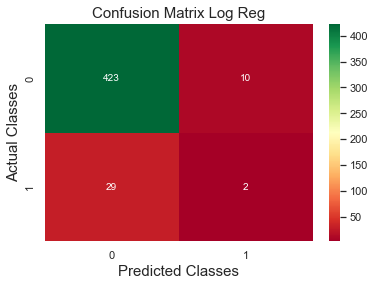

In [137]:
# visualizing confusion matrix
#HERE 0 SIGNIFIES -1
cm= confusion_matrix(Y_test, y_predictlg)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix Log Reg', fontsize = 15);

#5.E
1. Accuracy score of train is 94% and test is 91.5%. 
2. After PCA the accuracy improved when we fitted logistic +PCA

In [27]:
#5.F

#Since random forest performed really well on SMOTE DATASET. So, let's fit that and see
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 50)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = range(2,100,5)

# Minimum number of samples required at each leaf node
min_samples_leaf = range(1,100,10)

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
                'criterion':['gini','entropy']}

In [28]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 5, verbose=2, random_state=90, n_jobs = -1)
rf_random.fit(X_SMOTE, y_SMOTE)
rf_random.best_params_


Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 463,
 'min_samples_split': 82,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 110,
 'criterion': 'gini',
 'bootstrap': False}

In [138]:
rf_grid1 = RandomForestClassifier(n_estimators=463,
 min_samples_split= 82,
 min_samples_leaf=1,
 max_features= 'sqrt',
 max_depth= 110,
 criterion= 'gini',
 bootstrap= False)
rf_grid1.fit(X_SMOTE, y_SMOTE)

RandomForestClassifier(bootstrap=False, max_depth=110, max_features='sqrt',
                       min_samples_split=82, n_estimators=463)

In [139]:
modelrfg1_score=rf_grid1.score(X_SMOTE, y_SMOTE)
print('Accuracy Score of Training Data: ', modelrfg1_score)

Accuracy Score of Training Data:  0.9854497354497355


In [140]:
y_predictrfg1= rf_grid1.predict(X_test)
modelrfg1_score = accuracy_score(Y_test, y_predictrfg1)
print('Accuracy Score of Test Data:', modelrfg1_score)

Accuracy Score of Test Data: 0.9310344827586207


In [143]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(Y_test, y_predictrfg1, labels=[1, -1]))

Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        31
          -1       0.93      1.00      0.96       433

    accuracy                           0.93       464
   macro avg       0.47      0.50      0.48       464
weighted avg       0.87      0.93      0.90       464



In [142]:
#SVM

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
# Make grid search classifier
svm_grid= GridSearchCV(SVC(), param_grid, verbose = 2,cv=5, n_jobs = -1)
 
# Train the classifier
svm_grid.fit(X_train, Y_train)
svm_grid.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [144]:
svc_cv = SVC(kernel = 'rbf', gamma = 1, C = 0.1,probability=True)
svc_cv.fit(X_train, Y_train)

#ACCURACY
modelsv_score = svc_cv.score(X_train, Y_train)
print('Accuracy Score of Training Data: ', modelsv_score)

#PREDICTING ON TEST
y_predictsv= svc_cv.predict(X_test)
modelsv_score = accuracy_score(Y_test, y_predictsv)
print('Accuracy Score of Test Data:', modelsv_score)

#printing classification report
print("Classification Report")
print(metrics.classification_report(Y_test, y_predictsv, labels=[1, -1]))

Accuracy Score of Training Data:  0.9324699352451434
Accuracy Score of Test Data: 0.9331896551724138
Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        31
          -1       0.93      1.00      0.97       433

    accuracy                           0.93       464
   macro avg       0.47      0.50      0.48       464
weighted avg       0.87      0.93      0.90       464



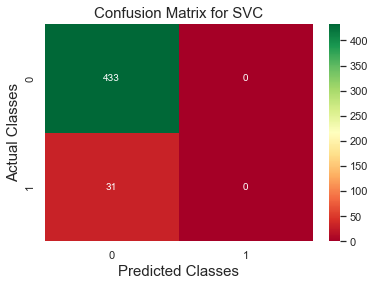

In [145]:
cm= confusion_matrix(Y_test, y_predictsv)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for SVC', fontsize = 15);

In [146]:
#BAD MODEL NOT ABLE TP PREDICTS 1

## 6. Post Training and Conclusion: 

#6.A

I fitted few logistic, Random forest and SVM with PCA and without PCA and also with balancing and without balancing. The best model performer is Logistic on original dataset after applying PCA. The accuracy on train dataset v/s test dataset hasn't reduced by alot of amount. 
Compared to other models the accuracy drops alot between train and test which indicates overfitting problem.


#6.B
The best model performer is Logistic on original dataset after applying PCA. The accuracy on train dataset v/s test dataset hasn't reduced by alot of amount. Compared to other models the accuracy drops alot between train and test which indicates overfitting problem.
Selection was based on accuracy score comparison of this model compared to other ones.


In [149]:
#6.C
import pickle
pickle.dump(lg, open('model.pkl', 'wb'))

#6.D
Based on the overall analysis and performances of the model we definetly need to have more domain knowledge and features knowledge to select best model and apply feature engineering. As far as PCA is considered, the models does better without it, Logistic model on origianl dataset gives the best overall results.